<div style="background: #D5CFF9; padding: 10px; border: 0.5px #B0E0E6; border-radius: 10px;"> 
    
**Название проекта**
    
Маркетинговая аналитика развлекательного приложения Procrastinate Pro+
    
_____
    
    
**Описание исследования**
    
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.
    
_____
    
    
**Цель исследования**
    
Провести анализ бизнес-метрик и понять, почему, несмотря на вложения в рекламу, компания терпит убытки, и помочь ей выйти в плюс.
    
_____
**Исходные данные**
    
В вашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура orders_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура costs_info_short.csv:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

______
    

**Данное исследование разделим на несколько частей.**

**[Часть 1. Изучение общей информации:](#part1)**
* [1. Загрузка библиотек, изученеие файлов с данными, получение общей информации.](#part1.1)
* [2. Построение столбиковых диаграмм по столбцам с категорийными данными.](#part1.2)

**[Часть 2. Подготовка данных:](#part2)**
* [1. Приведение названий столбцов к единому виду.](#part2.1)
* [2. Преобразование типов данных.](#part2.2)
    
**[Часть 3. Создание функций для расчёта и анализа LTV, ROI, удержания и конверсии:](#part3)**
* [1. Функция для создания профилей пользователей](#part3.1)
* [2. Функция для расчёта Retention Rate](#part3.2)
* [3. Функция для подсчёта конверсии](#part3.3)
* [4. Функция для расчёта LTV и ROI](#part3.4)
* [5. Функция для сглаживания данных](#part3.5)
* [6. Функция для построения графика Retention Rate](#part3.6)
* [7. Функция для построения графика конверсии](#part3.7)
* [8. Функция для визуализации LTV и ROI](#part3.8)
    
    
**[Часть 4. Составление портрета пользователей для каждого региона](#part4)**
    
**[Часть 5. Маркетинг:](#part5)**
* [1. Расчёт общей суммы расходов на маркетинг.](#part5.1)
* [2. Выяснение, как затраты распределены по рекламным источникам.](#part5.2)
* [3. Выяснение, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построение таблицы, отражающей количество пользователей и долю платящих для каждого устройства.](#part5.3)
* [4. Расчёт среднего CAC по каждому источнику.](#part5.4)
    
**[Часть 6. Оценка окупаемости рекламы:](#part6)**
* [1. Анализ окупаемости рекламы с помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.](#part6.1)
* [2. Анализ конверсии и удержания пользователей, а также их динамики. Построение и изучение графиков конверсии и удержания.](#part6.2)
* [3. Анализ окупаемости рекламы с разбивкой по устройствам. Построение графиков LTV, ROI, а также графиков динамики LTV, CAC, ROI.](#part6.3)
* [4. Анализ окупаемости рекламы с разбивкой по странам. Построение графиков LTV, ROI, а также графиков динамики LTV, CAC, ROI.](#part6.4)
* [5. Анализ окупаемости рекламы с разбивкой по рекламным каналам. Построение графиков LTV, ROI, а также графиков динамики LTV, CAC, ROI.](#part6.5)


**[Часть 7. Написание общего вывода](#part7)**    


    
_________________
    
    
</div>

<a id='part1'></a>
## Часть 1. Изучение общей информации

<a id='part1.1'></a>
### 1. Загрузка библиотек, изученеие файлов с данными, получение общей информации.

In [94]:
# загрузим необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [95]:
# загрузим датафреймы и распределим их по переменным
sessions = pd.read_csv('/datasets/visits_info_short.csv')
purchases = pd.read_csv('/datasets/orders_info_short.csv')
ad_costs = pd.read_csv('/datasets/costs_info_short.csv')

In [96]:
# взглянем на различные стройки датафреймов
df_list = [sessions, purchases, ad_costs]

for df in df_list:
    display(df.sample(10))

User Id         Region   Device         Channel  \
85358    95907317826  United States   iPhone         YRabbit   
57760    93521002889  United States   iPhone          TipTop   
242326   62142066801        Germany   iPhone  lambdaMediaAds   
201231  130851441556  United States      Mac          TipTop   
245179  152078830848        Germany   iPhone  lambdaMediaAds   
136630  609788221056  United States      Mac          TipTop   
252368  282255753371         France  Android         organic   
251241  390566777642        Germany      Mac  WahooNetBanner   
26947   240182262736  United States   iPhone          TipTop   
177418  708864089206  United States   iPhone         organic   

              Session Start          Session End  
85358   2019-07-25 11:56:14  2019-07-25 12:00:03  
57760   2019-06-29 03:58:35  2019-06-29 04:36:05  
242326  2019-07-09 18:21:31  2019-07-09 18:23:42  
201231  2019-10-25 07:19:13  2019-10-25 07:22:30  
245179  2019-07-15 07:24:13  2019-07-15 07:30:56  
136630  2019-09-07 05:00:57  2019-09-07 05:28:17  
252368  2019-07-30 04:18:35  2019-07-30 05:08:41  
251241  2019-07-28 14:21:39  2019-07-28 14:24:00  
26947   2019-05-28 20:51:35  2019-05-28 21:47:46  
177418  2019-10-07 00:55:40  2019-10-07 01:29:47

User Id             Event Dt  Revenue
1531   383703509267  2019-05-26 08:31:18     4.99
9277   296171647380  2019-07-24 16:32:46     4.99
23202   84992999992  2019-10-09 03:09:47     4.99
40022  785192008369  2019-10-29 01:23:30     4.99
23925  171676612072  2019-10-13 08:04:07     4.99
13427  988810631031  2019-08-20 15:17:20     4.99
22375  306043172347  2019-10-05 08:31:16     4.99
34465  111061381107  2019-08-31 11:18:45     4.99
29542  667938755744  2019-06-17 11:32:36     4.99
21149  783010843932  2019-09-30 23:18:36     4.99

dt             Channel    costs
1264  2019-05-05  OppleCreativeMedia    5.500
614   2019-07-14              TipTop  273.000
453   2019-08-02      RocketSuperAds    7.280
994   2019-08-03          AdNonSense   26.250
413   2019-06-23      RocketSuperAds   15.795
1144  2019-07-04             LeapBob   13.860
574   2019-06-04              TipTop  182.400
935   2019-06-05          AdNonSense   18.900
1505  2019-07-05      WahooNetBanner   34.800
154   2019-10-02            FaceBoom  259.600

**Промежуточный вывод:**
- не все названия столбцов имеют одинаковый формат, следует привести к одному виду.
- каналы, по которым происходит закупка рекламы, множество (как минимум 7).
- рынки, на которых работает компания, не только европейские: среди пользователей есть как клиенты из США, так и из европейских стран (France, UK).
- приложение распространяется не только на мобильных устройствах (Android, iPhone), но и на ПК (PC, Mac).
- вероятно, для целей анализа в будущем, следовало бы слегка преоборазовать формат некоторых дат, например, в Event Dt в датафрейме orders оставить только date.

In [97]:
# взглянем на типы данных столбцов и количество пропусков по столбцам

for df in df_list:
    df.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column 

**Промежуточный вывод:**
- пропусков во всех таблицах нет, типы данных во всех столбцах корректны (за исключением тех, что были уже упомянуты выше).

In [98]:
# взглянем описательные статистик по числовым данным

for df in df_list:
    display(df.describe())
    print()

User Id
count  3.099010e+05
mean   4.997664e+11
std    2.887899e+11
min    5.993260e+05
25%    2.493691e+11
50%    4.989906e+11
75%    7.495211e+11
max    9.999996e+11

User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000

costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000

**Промежуточные выводы:**
- описательные статистики по User Id не информативны.
- среднее и медиана по Revenue практически не отличаются, следовательно, мало аномальных значений выручки, а если они и есть, то склоняются в б*о*льшую сторону.
- минимальное значение, 1-й, 2-й и 3-й квартили равны. Это не удивительно, потому что, скорее всего, основной доход приложения - подписка стоимостью \\$4.99. Остальные варианты, например, максимальное значение, равное \\$49.99, вероятно, означает премиальную подписку по более высокой стоимостью, к покупке которой пользователи прибегают реже.
- среднее по затратам на рекламу (costs) значительно выше как медианы, так и третьего квартиля, значит, существует аномальных множество значений в правой стороне распределения, сильно влияющих на среднее. Например, был день, в который компания потратила на рекламу \\$630.

In [99]:
# взглянем на описательные статистики по категорийным данным

for df in df_list:
    display(df.describe(include=['object']))
    print()

Region  Device  Channel        Session Start  \
count          309901  309901   309901               309901   
unique              4       4       11               306813   
top     United States  iPhone  organic  2019-06-27 14:56:41   
freq           207327  112603   107760                    3   

                Session End  
count                309901  
unique               306793  
top     2019-07-16 02:23:30  
freq                      3

Event Dt
count                 40212
unique                40163
top     2019-10-26 06:49:22
freq                      2

dt   Channel
count         1800      1800
unique         180        10
top     2019-05-01  FaceBoom
freq            10       180

**Промежуточный вывод:**
- существует 4 уникальных региона, где работает приложение, самый популярный из которых - United States. 
- используется 4 девайса, самый популярных из которых - iPhone. 
- по 11 каналам привлечения люди узнают о приложении, самый популярных канал - organic.
- реклама закупается у 10 различных компаний. Самый популярный рекламодатель - FaceBoom.
- 1 мая 2019 года компания заказала рекламу сразу у 10 рекламодателей.

In [100]:
# посмотрим на количество дубликатов
for df in df_list:
    print(df.duplicated().sum())
    print()

0

0

0



<a id='part1.2'></a>
### 2. Построение столбиковых диаграмм по столбцам с категорийными данными.

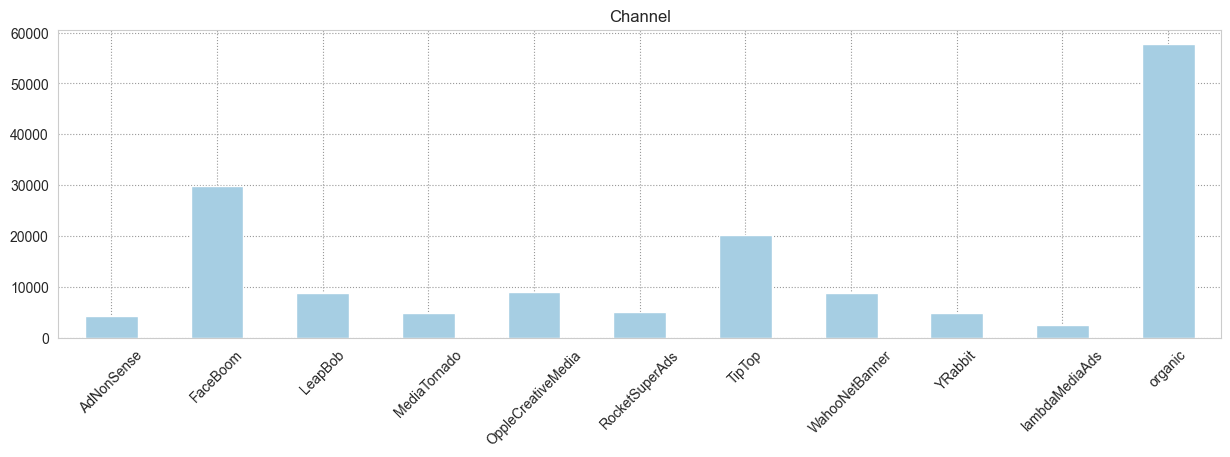

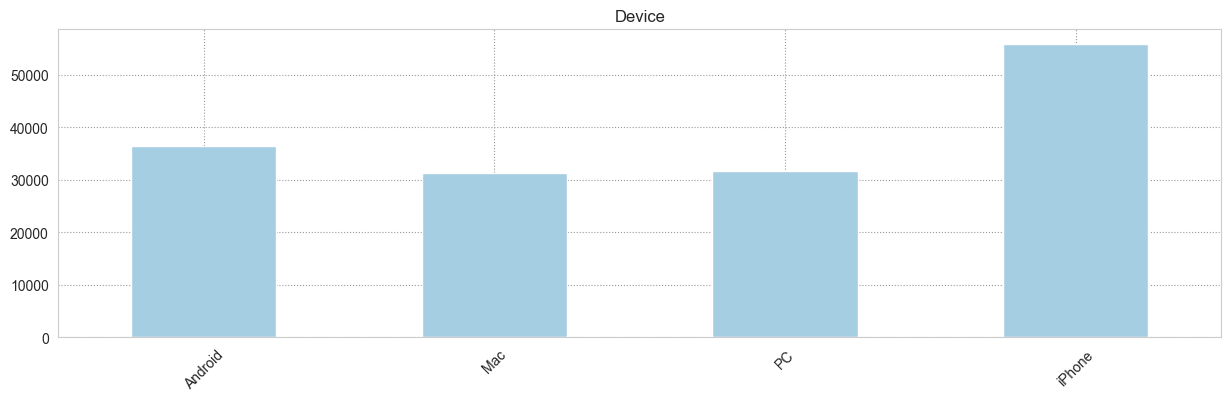

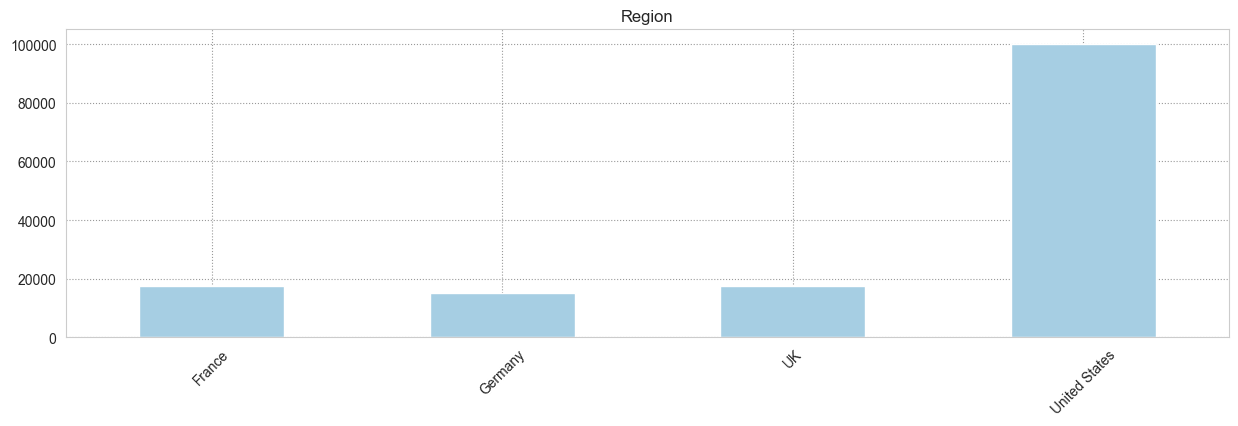

In [101]:
# построим столбиковые диаграммы для датафрейма visits, где результаты были бы
# информативными. Следовательно, исключим столбцы Session Start и Session End,
# так как наличие в столбцах времени сделало бы столбиковые диаграммы слишком
# детализированными.
for i in sessions.select_dtypes('object').columns.difference(['Session Start', 'Session End']):
    ax = (sessions
          .groupby(i)
          .agg({'User Id': 'nunique'})
          .plot.bar(figsize=(15, 4), legend=False, \
                    color=sns.color_palette('Paired')).set(xlabel='')
         )
    plt.title(i)
    plt.xticks(rotation=45)

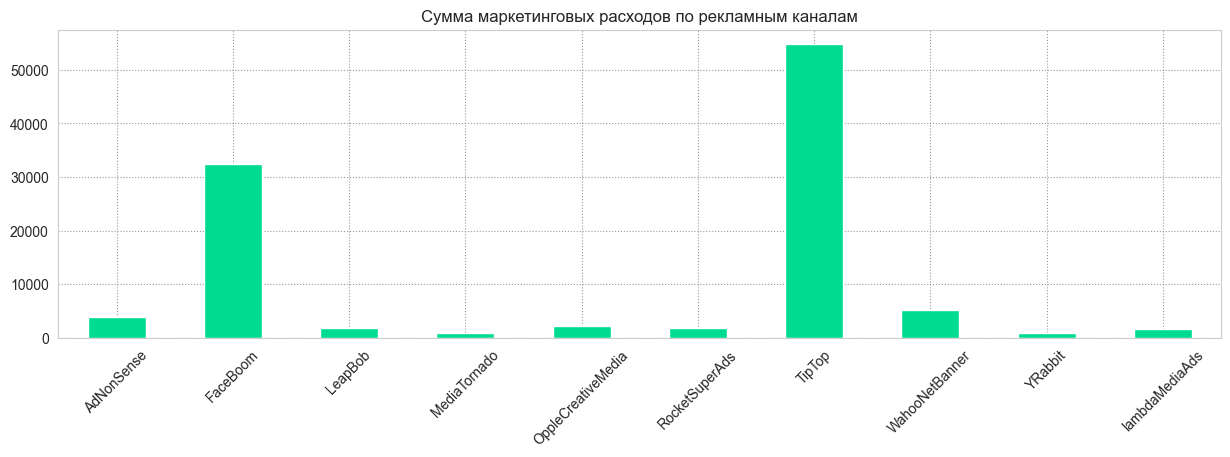

In [102]:
# построим столбиковую диаграмму по датафрейму ad_costs, где подсчитаем
# сумму маркетинговых расходов по каналам
(ad_costs.groupby('Channel').agg({'costs': 'sum'})
.plot.bar(figsize=(15, 4), legend=False, \
        color=sns.color_palette('winter_r')).set(xlabel='')
)
plt.title('Сумма маркетинговых расходов по рекламным каналам')
plt.xticks(rotation=45);

**Промежуточный вывод:**
- больше всего пользователей приходит органическим путём, далее по каналу FaceBoom и TipTop.
- самый популярный девайс пользователей - iPhone. Затем телефоны на операционной системе Android, и Mac с PC делят третье место.
- наибольшая доля пользователей находятся в United States с большим отрывом от отсальных регионов. Регионы France, Germany и UK занимают примерно равную долю.
- больше всего маркетингового бюджета уходит на рекламу по каналу TipTop с затратами в приблизительно \\$55k, на втором месте FaceBoom с затратами в \\$32k.
- интересно, что, несмотря на то, что на рекламу по каналу TipTop уходит больше всего рекламного бюджета, он приносит всё ещё привлекает меньше пользователей по сравнению с FaceBoom. FaceBoom же наоборот привлекает приблизительно на 10k пользователей больше, но рекламные расходы на \\$13k меньше.

**Вывод:**
- приложение выпускается в четырёх регионах: United States, France, Germany, UK. Самая большая доля - United States.
- приложение выпускается на четырёх девайсах: iPhone, Android, Mac, PC. Самый распространённый девайс среди пользователей - iPhone.
- компания закупает рекламу у 10 рекламодателей, больше всего тратит на TipTop и FaceBoom. FaceBoom выглядит более привлекательным рекламодателем на фоне TipTop, так как за меньшие рекламные расходы приносит компании больше пользователей.
- явных дубликатов и пропусков нет.
- следует привести формат названий столбцов к единому виду.
- к столбцах с датами, где это необходимо, привести к формату дат, отсечь время.

<a id='part2'></a>
## Часть 2. Подготовьте данные

<a id='part2.1'></a>
### 1. Приведение названий столбцов к единому виду.

In [103]:
# приведём названия столбцов к нижнему регистру
for df in df_list:
    df.columns = df.columns.str.lower()
    
# заменим все пробелы в столбцах на _
for df in df_list:
    df.columns = df.columns.str.replace(' ', '_')

<a id='part2.2'></a>
### 2. Преобразование типов данных.

In [104]:
# для датафрейма sessions
for col in ['session_start', 'session_end']:
    sessions[col] = pd.to_datetime(sessions[col])
    
# для датафрейма orders
purchases['event_dt'] = pd.to_datetime(purchases['event_dt'])

# для датафрейма ad_costs
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date

<a id='part3'></a>
## Часть 3. Создание функций для расчёта и анализа LTV, ROI, удержания и конверсии.

<a id='part3.1'></a>
### 1. Функция для создания профилей пользователей

In [105]:
# функция для создания пользовательских профилей

def get_profiles(sessions, purchases, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(purchases['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

<a id='part3.2'></a>
### 2. Функция для подсчёта Retention Rate

In [106]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<a id='part3.3'></a>
### 3. Функция для подсчёта конверсии

In [107]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<a id='part3.4'></a>
### 4. Функция для расчёта LTV и ROI

In [108]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

<a id='part3.5'></a>
### 5. Функция для сглаживания данных

In [109]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

<a id='part3.6'></a>
### 6. Функция для построения графика Retention Rate

In [110]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon_days, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon_days - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon_days
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon_days
        )
    )
    
    plt.tight_layout()
    plt.show()

<a id='part3.7'></a>
### 7. Функция для построения графика конверсии

In [111]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon_days, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon_days - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon_days))

    plt.tight_layout()
    plt.show()

<a id='part3.8'></a>
### 8. Функция для визуализации LTV и ROI

In [112]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon_days - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon_days - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon_days))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon_days))

    plt.tight_layout()
    plt.show()

<a id='part4'></a>
## Часть 4. EDA

<a id='part4.1'></a>
### 1. Составление профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей

In [113]:
# составим профили пользователей
profiles = get_profiles(sessions, purchases, ad_costs)
profiles.sample(5)

user_id            first_ts         channel   device  \
115814  771746884445 2019-09-30 21:56:05         organic       PC   
76643   508675265605 2019-08-24 02:13:03  WahooNetBanner  Android   
87201   580322851587 2019-06-13 20:35:22         organic   iPhone   
38208   253431850490 2019-05-22 14:24:37        FaceBoom  Android   
110037  732887994285 2019-09-13 01:06:34         organic   iPhone   

               region          dt               month  payer  acquisition_cost  
115814             UK  2019-09-30 2019-09-30 21:56:05  False          0.000000  
76643              UK  2019-08-24 2019-08-24 02:13:03  False          0.583562  
87201   United States  2019-06-13 2019-06-13 20:35:22  False          0.000000  
38208   United States  2019-05-22 2019-05-22 14:24:37  False          1.100000  
110037  United States  2019-09-13 2019-09-13 01:06:34  False          0.000000

In [114]:
# определим минимальную и максимальную дату посещения пользователей
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()
print(f'Минимальная дата посещения пользователей: {min_analysis_date}')
print(f'Максимальная дата посещения пользователей: {max_analysis_date}')

Минимальная дата посещения пользователей: 2019-05-01
Максимальная дата посещения пользователей: 2019-10-27


<a id='part4.2'></a>
### 2. Выяснение, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построение таблицы, отражающей количество пользователей и долю платящих из каждой страны.

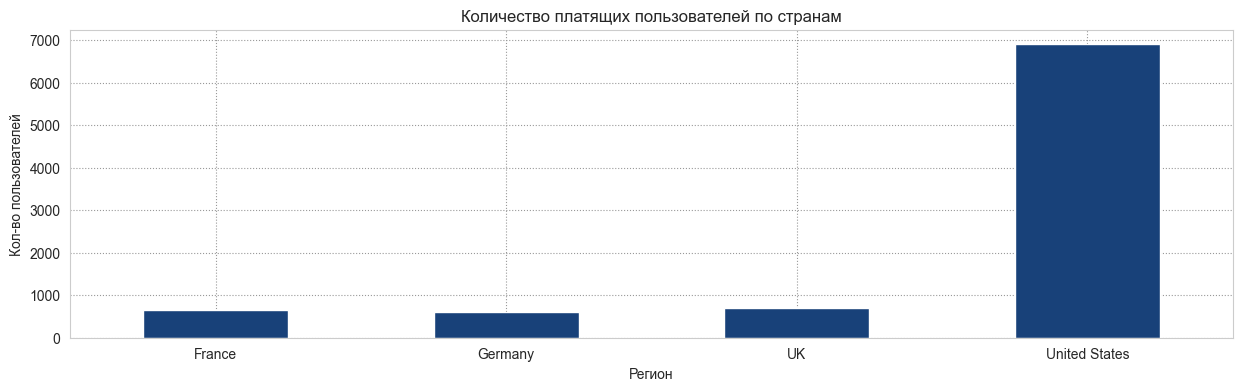

In [115]:
# выясним, на какую страну приходится больше всего платящих пользователей
(profiles
 .query('payer == True')
 .groupby('region')
 .agg({'user_id': 'nunique'})
 .plot.bar(figsize=(15, 4), legend=False, \
           color=sns.color_palette('gist_earth'))
 .set(xlabel='Регион', ylabel='Кол-во пользователей')
)
plt.title('Количество платящих пользователей по странам')
plt.xticks(rotation=0);

In [116]:
# создадим таблицу с кол-вом пользователей, кол-во платящих пользователей
# и долей платящих по каждой стране
users_share_by_region = (profiles
                         .groupby('region')
                         .agg({'payer': ['count', 'sum']})
                         .reset_index()
                         .droplevel(0, axis=1)
                         .rename(columns={'count': 'all_users', 'sum': 'paying_users'})
                        )
users_share_by_region['payers_share'] = (round((users_share_by_region['paying_users'] 
                                                / users_share_by_region['all_users'] * 100), 2))

users_share_by_region.sort_values(by='payers_share', ascending=False)

all_users  paying_users  payers_share
3  United States     100002          6902          6.90
1        Germany      14981           616          4.11
2             UK      17575           700          3.98
0         France      17450           663          3.80

**Промежуточный вывод:**
- пользователи приходят в приложение из следующих стран: United States, UK, Germany, France.
- больше всего платящих пользователей приходится на United States.
- больше всего пользователей неплатящих пользователей находятся в United States. Вероятно, это первый рынок, на который выходила компания. Кроме того, судя по количеству платящих пользователей с United States, им либо больше, чем пользователям из других регионов, нравится/подходит это приложение, либо при размещении рекламы компания концентрируется в основном на американском рынке. Можно предположить, что у рынка United States большой потенциал, так как у приложения в этом регионе существует гораздо больше пользователей, которых можно попытаться перевести из неплатящих в платящих.

<a id='part4.3'></a>
### 3. Выяснение, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построение таблицы, отражающей количество пользователей и долю платящих для каждого устройства.

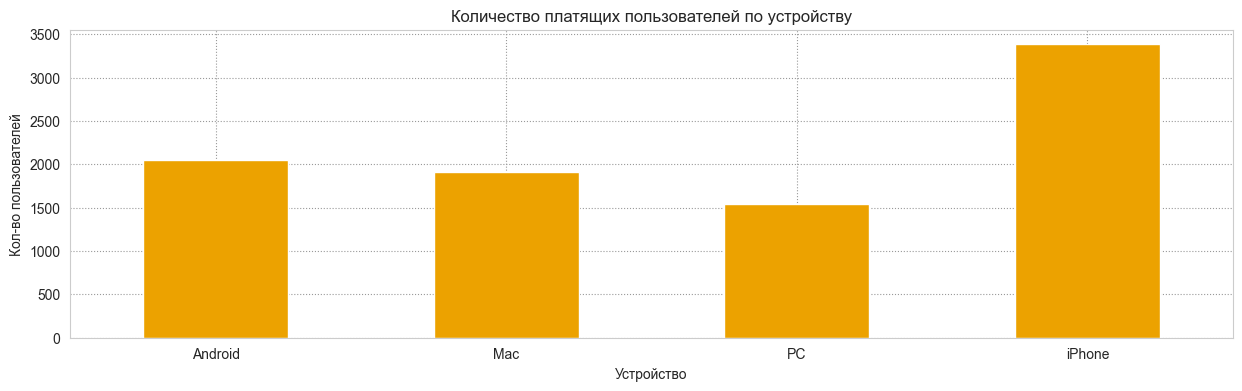

In [117]:
# выясним, на какое устройство приходится больше всего платящих пользователей
(profiles
 .query('payer == True')
 .groupby('device')
 .agg({'user_id': 'nunique'})
 .plot.bar(figsize=(15, 4), legend=False, \
           color=sns.color_palette('gnuplot_r'))
 .set(xlabel='Устройство', ylabel='Кол-во пользователей')
)
plt.title('Количество платящих пользователей по устройству')
plt.xticks(rotation=0);

In [118]:
# создадим таблицу с кол-вом пользователей, кол-во платящих пользователей
# и долей платящих по каждому устройству
users_share_by_device = (profiles
                         .groupby('device')
                         .agg({'payer': ['count', 'sum']})
                         .reset_index()
                         .droplevel(0, axis=1)
                         .rename(columns={'count': 'all_users', 'sum': 'paying_users'})
                        )
users_share_by_device['payers_share'] = (round((users_share_by_device['paying_users'] 
                                                / users_share_by_device['all_users'] * 100), 2))

users_share_by_device.sort_values(by='payers_share', ascending=False)

all_users  paying_users  payers_share
1      Mac      30042          1912          6.36
3   iPhone      54479          3382          6.21
0  Android      35032          2050          5.85
2       PC      30455          1537          5.05

**Промежуточный вывод:**
- больше всего платящих пользователей пользуются iPhone, далее, по убыванию, Android, Mac, PC.
- пользователи Mac с б*о*льшей охотой приобретают подписку и у них не малый потенциал, судя по количеству неплатящих пользователей.
- наибольшим потенциалом, на мой взгляд, обладают пользователи iPhone: их привлечено больше всех, кроме того, доля платящих уступает лидеру (Mac) всего на 0.15%.

<a id='part4.4'></a>
### 4. Определение каналов, из которых пришло больше всего платящих пользователей. Построение таблицы, отражающей количество пользователей и долю платящих для каждого канала привлечения.

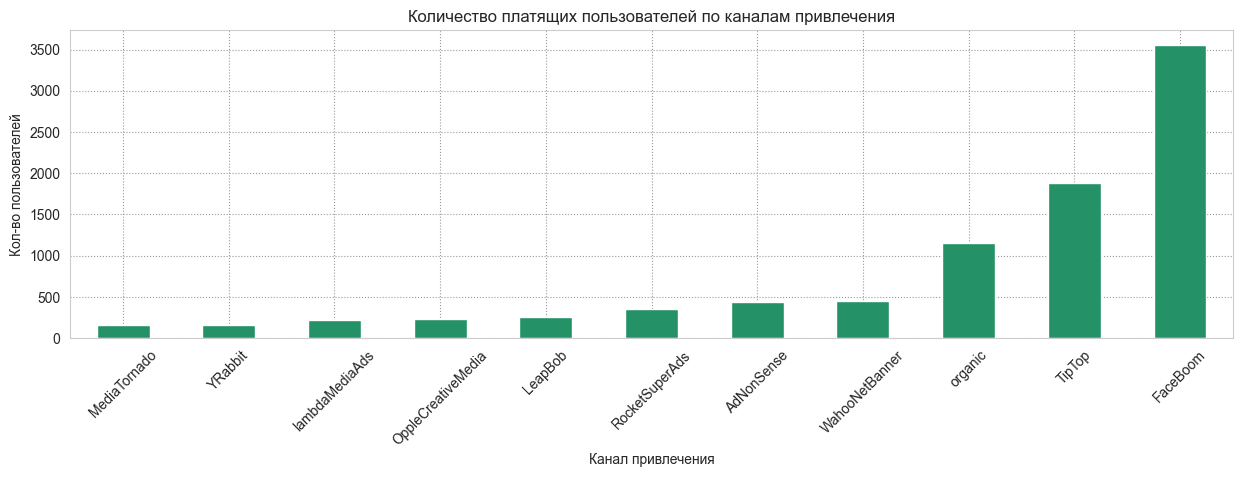

In [119]:
# выясним, какой канал привлечения приводит больше всего платящих пользователей
(profiles
 .query('payer == True')
 .groupby('channel')
 .agg({'user_id': 'nunique'})
 .sort_values(by='user_id')
 .plot.bar(figsize=(15, 4), legend=False, \
           color=sns.color_palette('summer'))
 .set(xlabel='Канал привлечения', ylabel='Кол-во пользователей')
)
plt.title('Количество платящих пользователей по каналам привлечения')
plt.xticks(rotation=45);

In [120]:
# создадим таблицу с кол-вом пользователей, кол-во платящих пользователей
# и долей платящих по каждому устройству
users_share_by_channel = (profiles
                         .groupby('channel')
                         .agg({'payer': ['count', 'sum']})
                         .reset_index()
                         .droplevel(0, axis=1)
                         .rename(columns={'count': 'all_users', 'sum': 'paying_users'})
                        )
users_share_by_channel['payers_share'] = (round((users_share_by_channel['paying_users'] 
                                                / users_share_by_channel['all_users'] * 100), 2))

users_share_by_channel.sort_values(by='payers_share', ascending=False)

all_users  paying_users  payers_share
1             FaceBoom      29144          3557         12.20
0           AdNonSense       3880           440         11.34
9       lambdaMediaAds       2149           225         10.47
6               TipTop      19561          1878          9.60
5       RocketSuperAds       4448           352          7.91
7       WahooNetBanner       8553           453          5.30
8              YRabbit       4312           165          3.83
3         MediaTornado       4364           156          3.57
2              LeapBob       8553           262          3.06
4   OppleCreativeMedia       8605           233          2.71
10             organic      56439          1160          2.06

**Промежуточный вывод:**
- больше всего платящих пользователей приносят следующие каналы: FaceBoom, TipTop, organic. Нахождение в топ-3 organic можно объяснить большим общим количеством привлечённых пользователей. 2.06% от 56к пользователей и приносит третье место в топе по количеству платящих.
- у каналов привлечения AdNonSense и lambdaMediaAds отличный потенциал: например, у AdNonSense при всего 3880 привлечённых пользователей, 11.34% из них - платящие. Вспоминая наш первичный анализ маркетинговых затрат по каналам привлечения, вспомним, что больше всего на привлечение пользователей тратится на каналы TipTop и FaceBoom. При довольно больших затратах на TipTop, данный канал приносит всё ещё меньше платящих пользователей, чем AdNonSense и lambdaMediaAds.
- вложения в FaceBoom, на первый взгляд, кажутся подходящими, кроме того, FaceBoom приносит больше всего платящих пользователей, однако, предположу, что, как и у TipTop, у него будет низкий или вовсе отрицательный ROI.

<a id='part5'></a>
## Часть 5. Маркетинг

<a id='part5.1'></a>
### 1. Расчёт общей суммы расходов на маркетинг

In [121]:
# рассчитаем общую сумму расходов на маркетинг
round(ad_costs['costs'].sum(), 2)

105497.3

<a id='part5.2'></a>
### 2. Выяснение, как затраты распределены по рекламным источникам

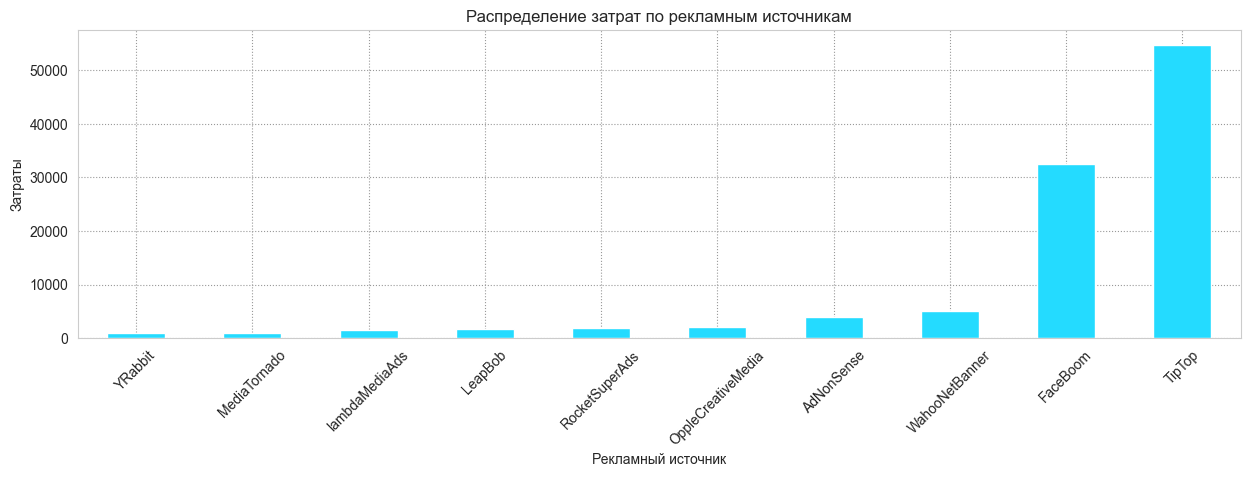

In [122]:
(ad_costs
 .groupby('channel')
 .agg({'costs': 'sum'})
 .sort_values(by='costs')
 .plot.bar(figsize=(15, 4), legend=False, \
           color=sns.color_palette('cool'))
 .set(xlabel='Рекламный источник', ylabel='Затраты')
)

plt.title('Распределение затрат по рекламным источникам')
plt.xticks(rotation=45);

**Промежуточный вывод:**
- наибольшие затраты пришлись на следующие каналы привлечения: TipTop, FaceBoom. На TipTop приходится приблизительно больше 50% от общих расходов на маркетинг, на FaceBoom - около 30%.

<a id='part5.3'></a>
### 3. Построение визуализации динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику

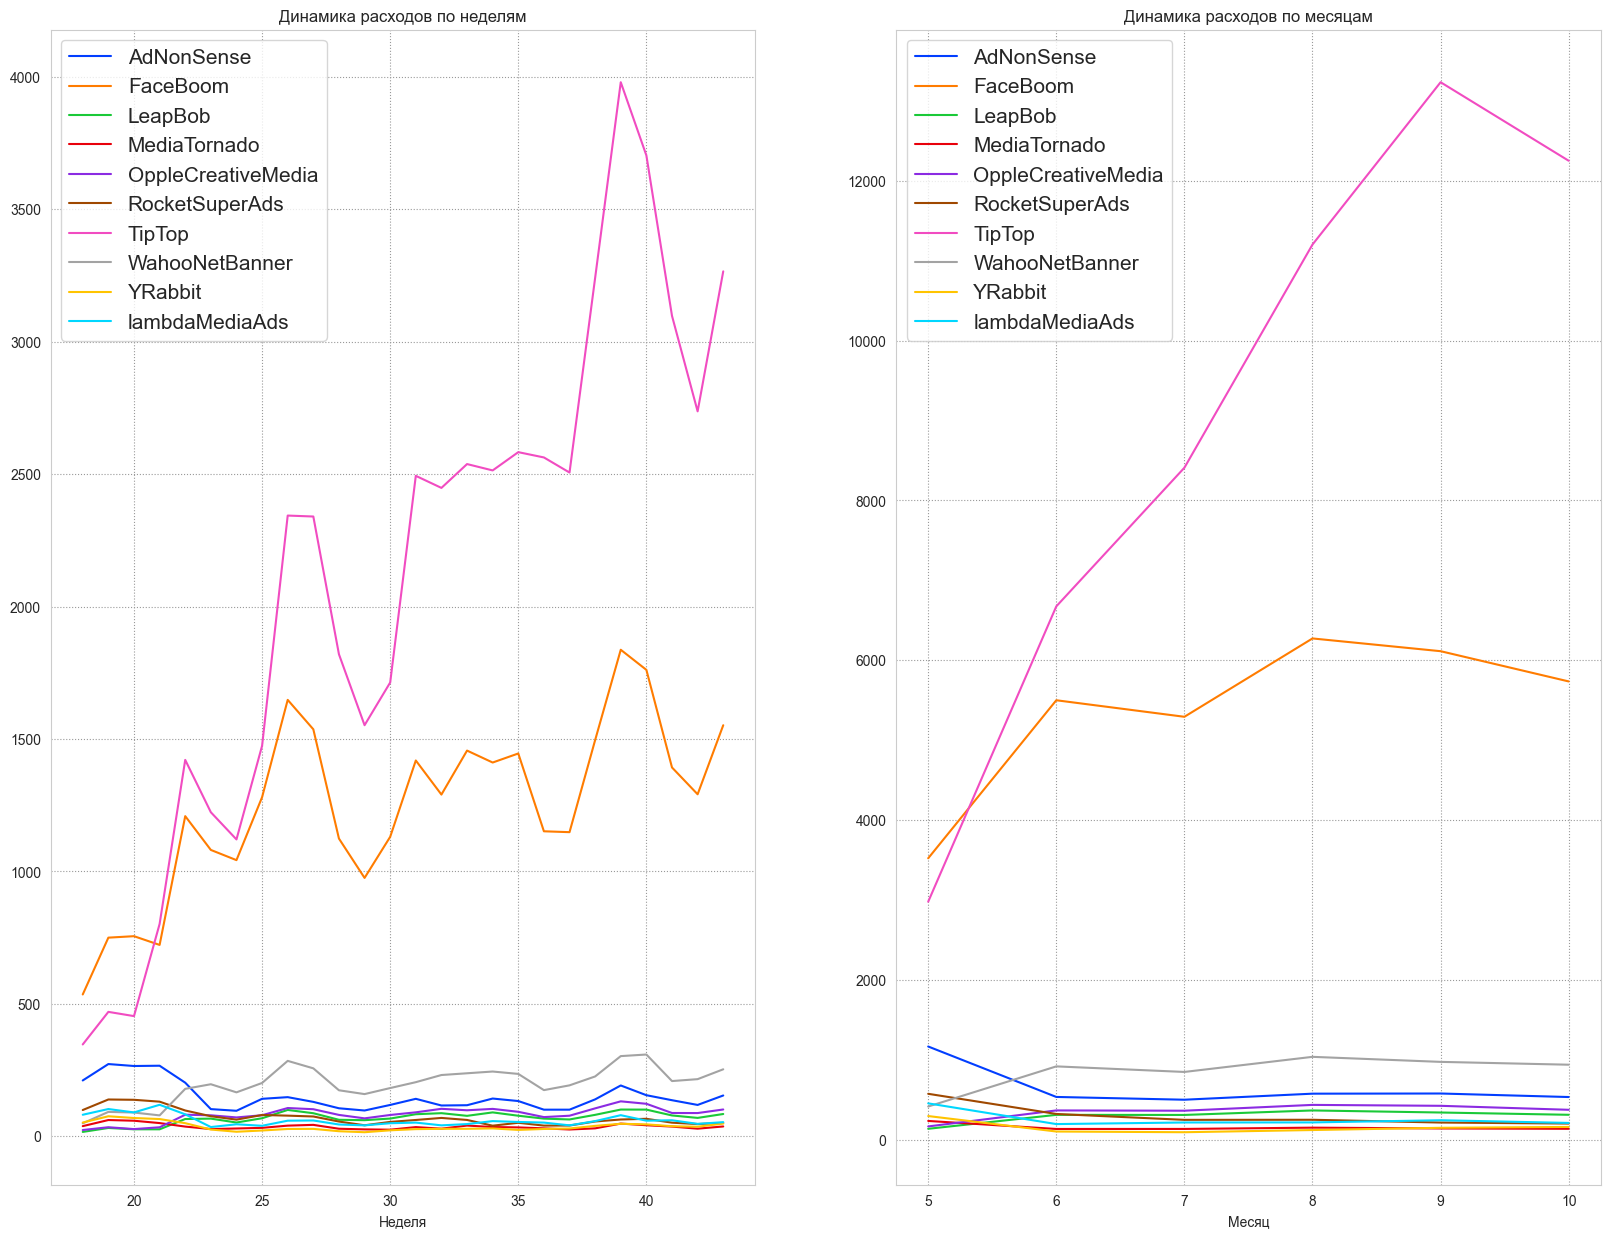

In [123]:
# добавим в таблицу ad_costs неделю и месяц расходов
ad_costs['week'] = pd.to_datetime(ad_costs['dt']).dt.isocalendar().week
ad_costs['month'] = pd.to_datetime(ad_costs['dt']).dt.month

# построим графики динамики расходов по неделям и месяцам
plt.figure(figsize=(20, 15))

ax1 = plt.subplot(1, 2, 1)
(ad_costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
         .plot(grid=True, ax=ax1, color=sns.color_palette('bright'))
)
plt.xlabel('Неделя')
plt.title('Динамика расходов по неделям')
plt.xticks(rotation=0)
plt.legend(prop={'size': 15})

ax2 = plt.subplot(1, 2, 2)
(ad_costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
         .plot(grid=True, ax=ax2, color=sns.color_palette('bright'))
)
plt.xlabel('Месяц')
plt.title('Динамика расходов по месяцам')
plt.xticks(rotation=0)
plt.legend(prop={'size': 15});

**Промежуточный вывод:**
- начиная с мая, компания сосредоточилась на двух каналах привлечения, TipTop и FaceBoom, судя по значительно возросшим тратам на них.

<a id='part5.4'></a>
### 4. Расчёт среднего CAC по каждому источнику

In [124]:
# построим таблицу со средним CAC по рекламным источникам
(profiles
         .groupby('channel')
         .agg({'acquisition_cost': 'mean'})
         .sort_values(by='acquisition_cost', ascending=False)
)

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

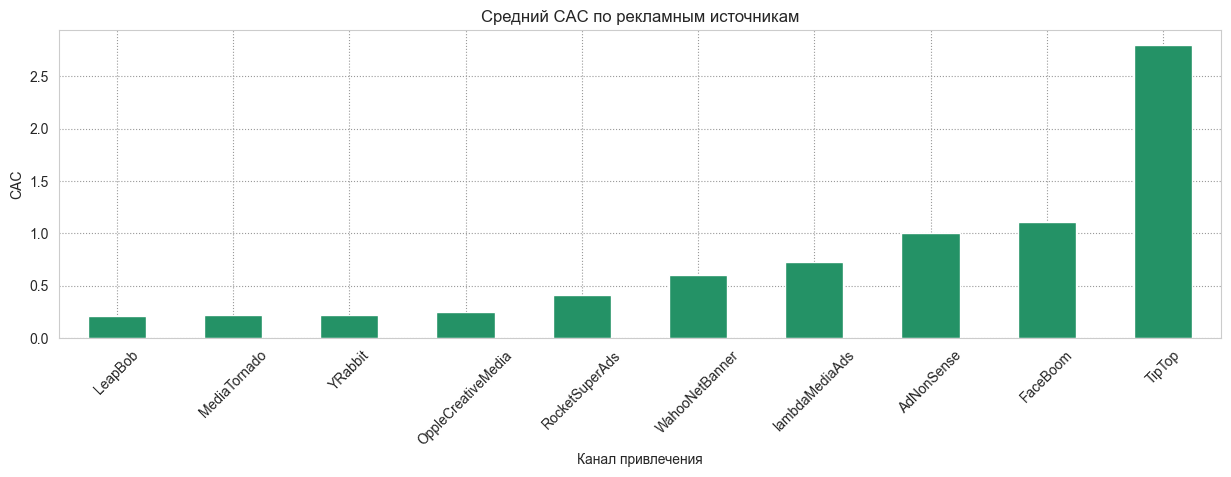

In [125]:
# на основе получившейся таблицы построим график
(profiles
         .groupby('channel')
         .agg({'acquisition_cost': 'mean'})
         .drop('organic')
         .sort_values(by='acquisition_cost', ascending=True)
         .plot.bar(figsize=(15, 4), legend=False, color=sns.color_palette('summer'))
         .set(xlabel='Канал привлечения', ylabel='CAC')
)

plt.title('Средний CAC по рекламным источникам')
plt.xticks(rotation=45);

In [126]:
# посчитаем средний CAC по всему проекту
profiles['acquisition_cost'].mean()

0.7032778251826568

**Промежуточный вывод:**
- самая высокая стоимость привлечения одного пользователя у TipTop и составляет \\$2.79.
- остальные рекламные источники существенно отстают по стоимости привлечения одного пользователя от TipTop
- топ-4 каналов привлечения по уровню CAC выше среднего CAC по всем каналам. На TipTop делаются значительные траты, так как он превышает средний CAC в 4 раза
- несмотря на то, что компания делает значительные вложения в рекламу от FaceBoom, средняя стоимость привлечения по FaceBoom значительно ниже оной по TipTop. Делать более подробные выводы по остальным каналам привлечения по одним только графикам довольно тяжело, без бизнес-метрик не обойтись.

<a id='part6'></a>
## Часть 6. Оценка окупаемости рекламы

<a id='part6.1'></a>
### 1. Анализ окупаемости рекламы с помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [127]:
# исключим канал привлечения organic из анализа, так как нулевой CAC
# делает бессмысленным расчёт ROI по organic
profiles = profiles.query('channel != "organic"')

In [128]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

# получим таблицу LTV, LTV в динамике, ROI и ROI в динамике
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
                                                     profiles,
                                                     purchases,
                                                     observation_date,
                                                     horizon_days,
                                                     dimensions=[],
                                                     ignore_horizon=False
                                                     )

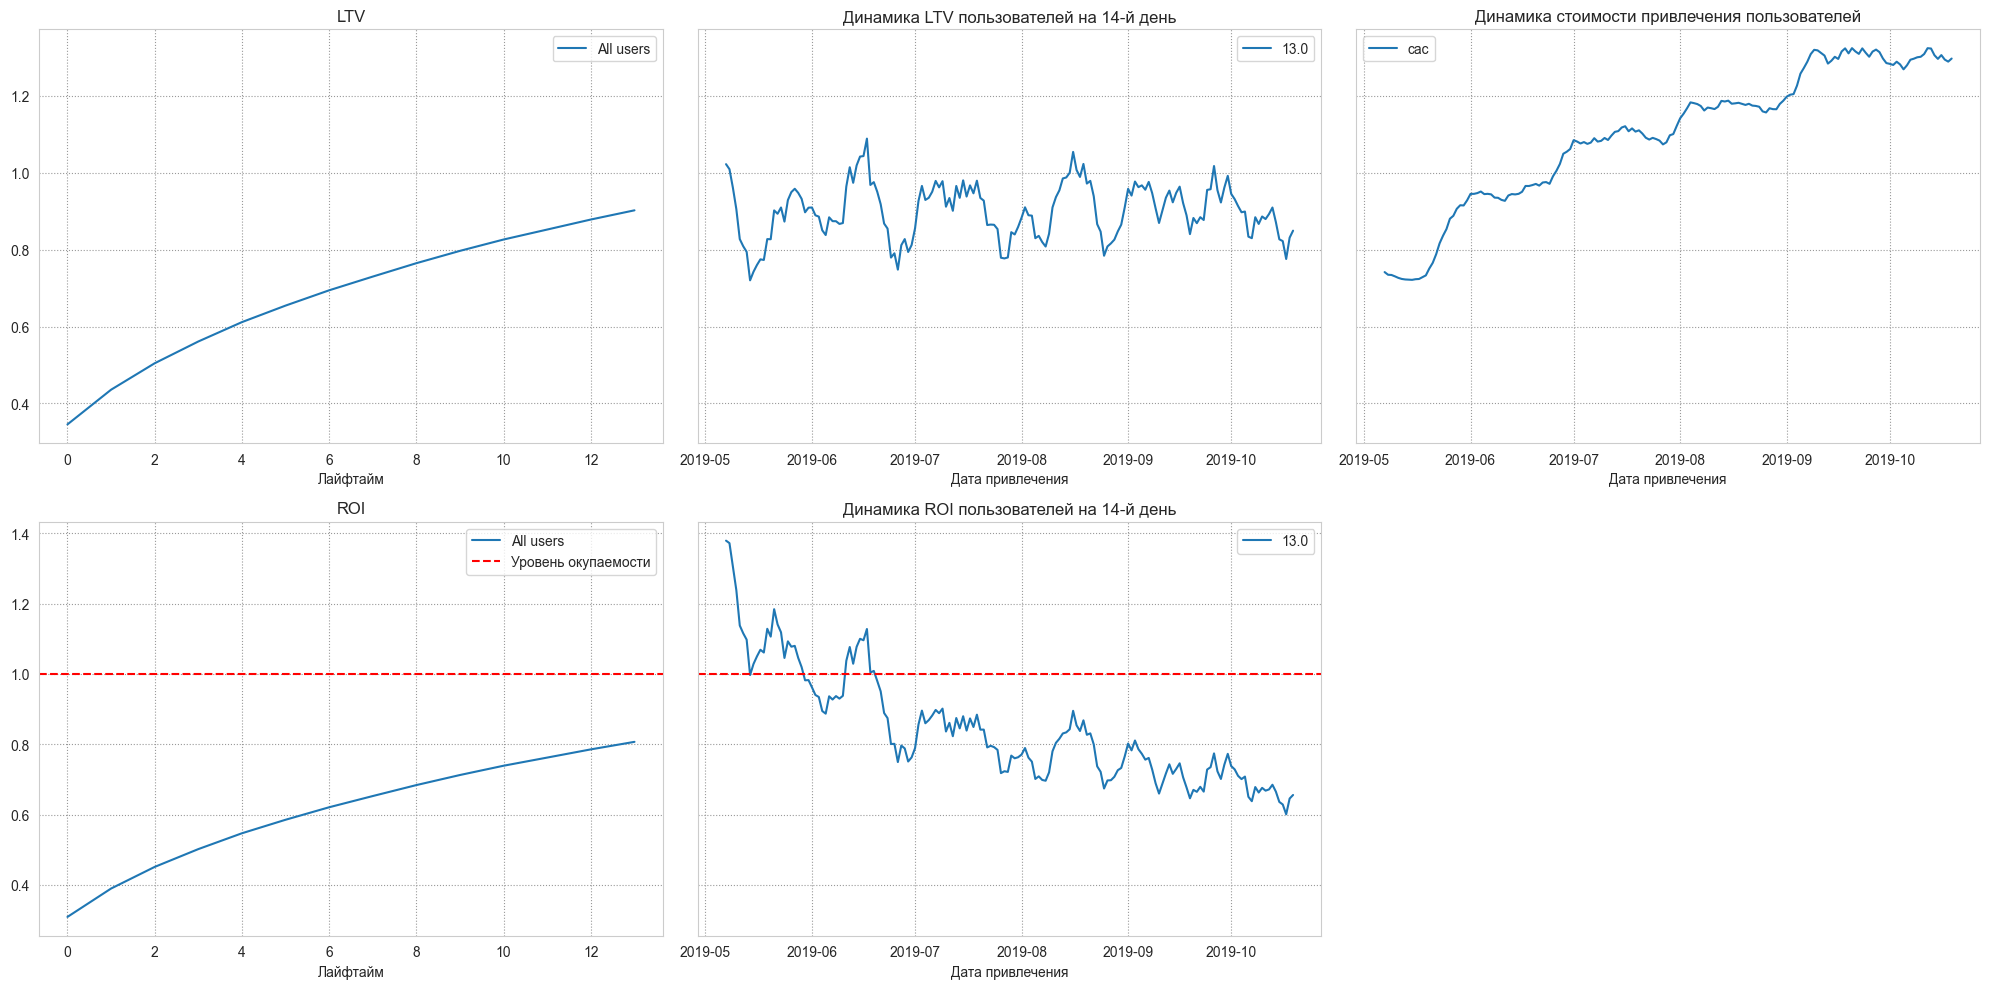

In [129]:
# построим графики динамики LTV, CAC и ROI
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

**Промежуточный вывод:**
- кривая LTV постоянно растёт ожидаемым образом, значит момент и горизонт анализа данных был определён верно.
- судя по динамике LTV, средний LTV на 14 день составляет \\$0.9. Самые "удачные" с точки зрения LTV пользователи (LTV свыше \\$1) приходили в середине июня, середине июля и середине августа. В целом, LTV стабилен, значит проблема не в ухудшении качества пользователей.
- CAC не стабилен и резко вырастает. С высокой вероятностью, увеличение рекламного бюджета и является причиной того, что последние несколько месяцев компания терпит убытки.
- к концу двухнедельного периода ROI окупается только на 80%.
- в целом, данные графики дают понять только то, что реклама компании не окупается большинство времени, ROI к концу двухнедельного периода сначала держится на уровне окупаемости, но потом падает вместе с растущей стоимостью рекламы и недостаточно быстро растущим LTV. Затраты слишком высоки по сравнению с тем, сколько могут принести привлечённые пользователи. Чтобы узнать точнее, где именно происходят затраты, приводящие к низкому ROI, следует сделать срез по всем доступным характеристикам: устройству, стране, рекламному каналу. 

<a id='part6.2'></a>
### 2. Анализ конверсии и удержания пользователей, а также их динамики. Построение и изучение графиков конверсии и удержания.

In [130]:
# получим таблицу конверсии и конверсии в динамике
conversion_raw, conversion, conversion_history = get_conversion(
                                                                profiles,
                                                                purchases,
                                                                observation_date,
                                                                horizon_days,
                                                                dimensions=[],
                                                                ignore_horizon=False,
                                                                )

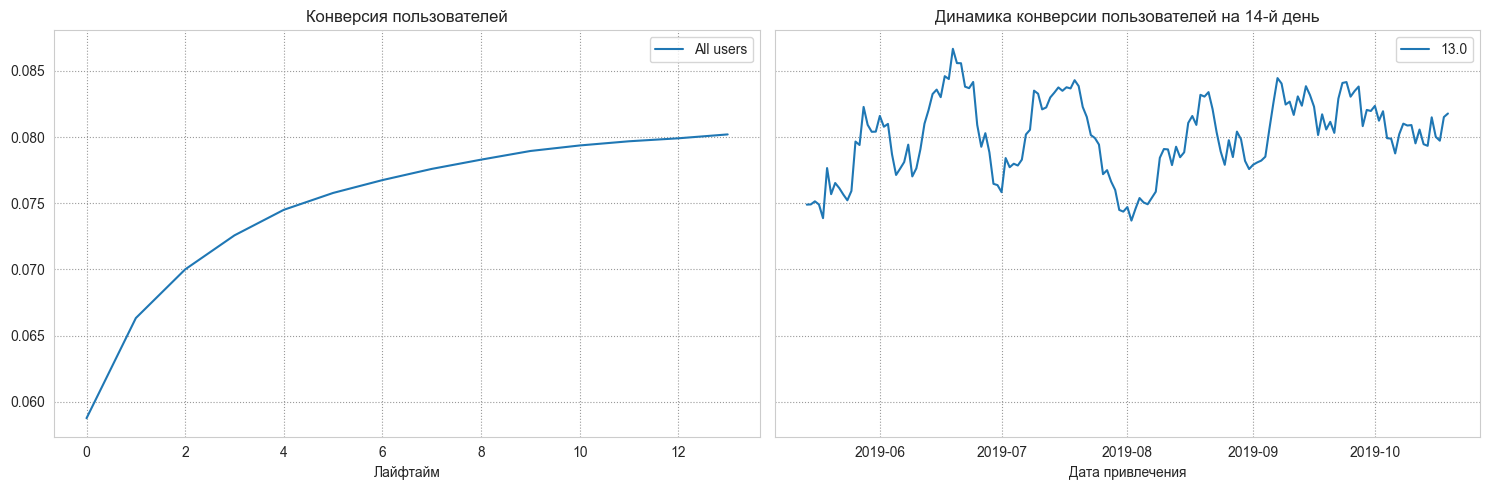

In [131]:
# постром графики конверсии
plot_conversion(conversion, conversion_history, horizon_days, window=14)

**Промежуточный вывод:**
- к 14 дню конверсия достигает 8%.
- средняя конверсия на 14-й день на графике динамики конверсии также составляет приблизительно 8%.

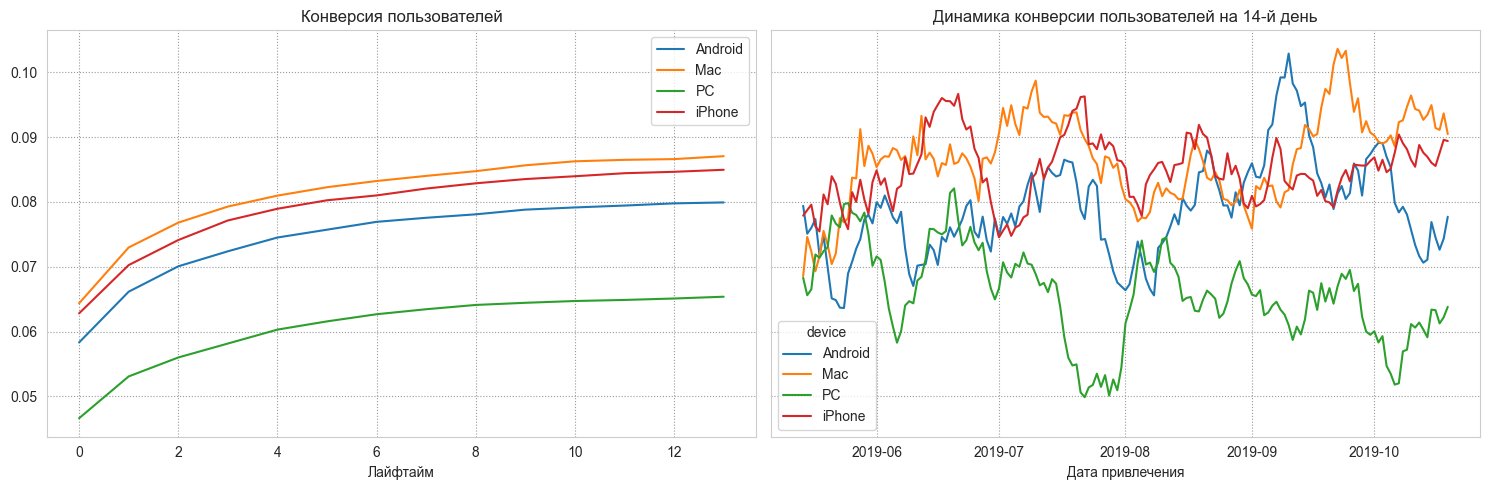

In [132]:
# получим таблицу конверсии и конверсии в динамике по устройствам
conversion_raw, conversion, conversion_history = get_conversion(
                                                                profiles,
                                                                purchases,
                                                                observation_date,
                                                                horizon_days,
                                                                dimensions=['device'],
                                                                ignore_horizon=False,
                                                                )

# постром графики конверсии по устройствам
plot_conversion(conversion, conversion_history, horizon_days, window=14)

**Промежуточный вывод:**
- наихудшая конверсия у PC, наилучшая - у Mac

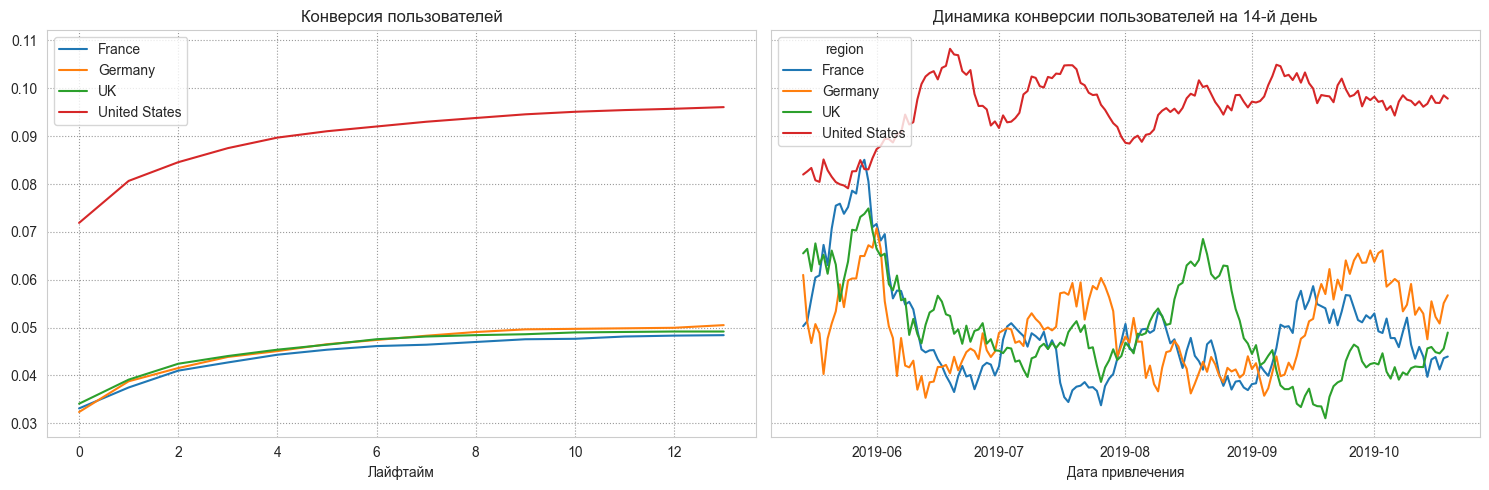

In [133]:
# получим таблицу конверсии и конверсии в динамике по странам
conversion_raw, conversion, conversion_history = get_conversion(
                                                                profiles,
                                                                purchases,
                                                                observation_date,
                                                                horizon_days,
                                                                dimensions=['region'],
                                                                ignore_horizon=False,
                                                                )

# постром графики конверсии по странам
plot_conversion(conversion, conversion_history, horizon_days, window=14)

**Промежуточный вывод:**
- наилучшая конверсия в United States

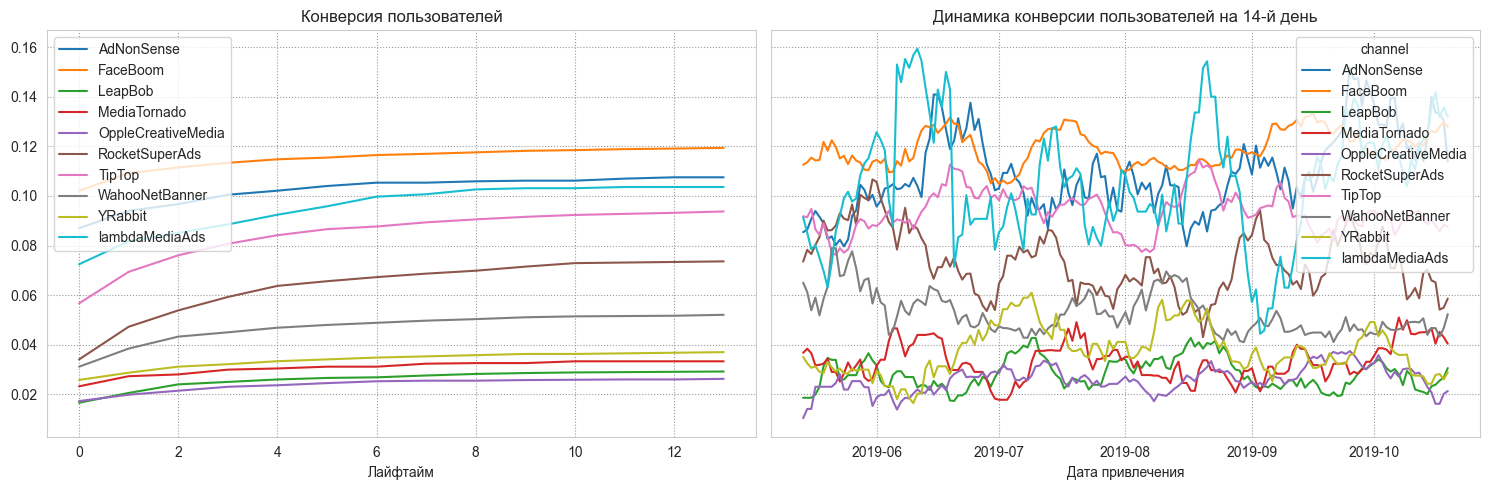

In [134]:
# получим таблицу конверсии и конверсии в динамике по рекламным каналам
conversion_raw, conversion, conversion_history = get_conversion(
                                                                profiles,
                                                                purchases,
                                                                observation_date,
                                                                horizon_days,
                                                                dimensions=['channel'],
                                                                ignore_horizon=False,
                                                                )

# постром графики конверсии по рекламным каналам
plot_conversion(conversion, conversion_history, horizon_days, window=14)

**Промежуточный вывод:**
- наилучшая конверсия у FaceBoom, AdNonSense, lambdaMediaArts

In [135]:
# получим таблицу удержания и удержания в динамике
retention_raw, retention, retention_history = get_retention(
                                                            profiles,
                                                            sessions,
                                                            observation_date,
                                                            horizon_days,
                                                            dimensions=[],
                                                            ignore_horizon=False,
                                                            )

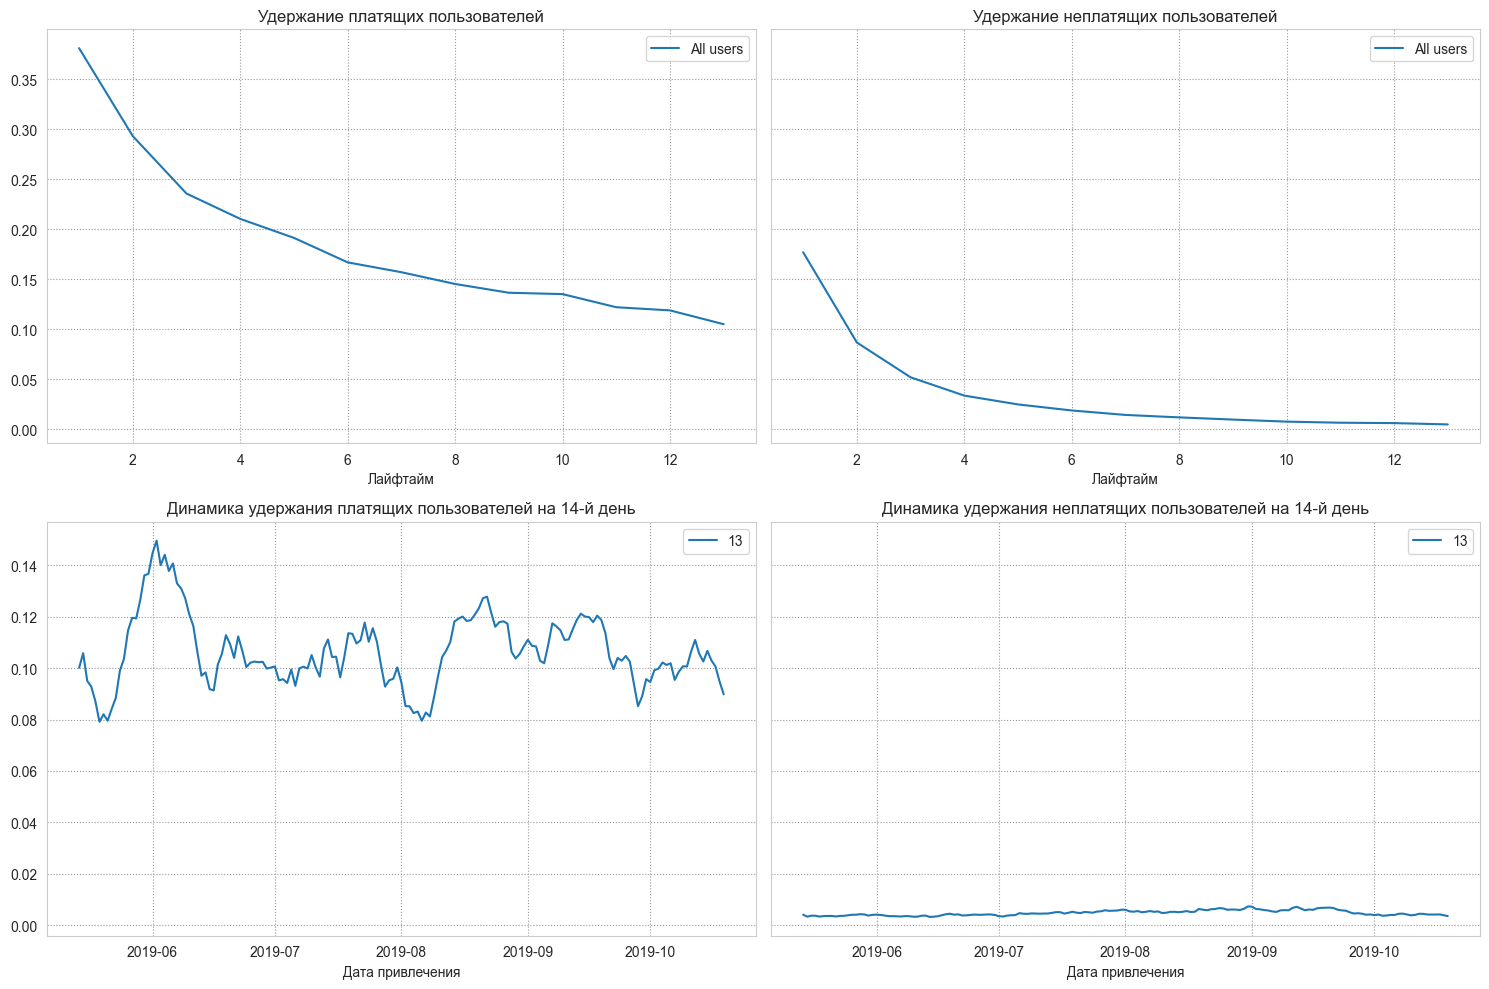

In [136]:
# построим графики удержания
plot_retention(retention, retention_history, horizon_days, window=14)

**Промежуточный вывод:**
- удержание платящих пользователей в среднем выше, чем удержание неплатящих пользователей, что естественно. Обе кривые постепенно снижаются.
- удержание платящих пользователей на 14-й день составляет примерно 0.1-0.11. Пользователи с самым высоким показателем удержания были привлечены в конце мая-начале июня, где показатель удержания равен приблизительно 0.14.
- удержание неплатящих пользователей на одинаково низком уровне.

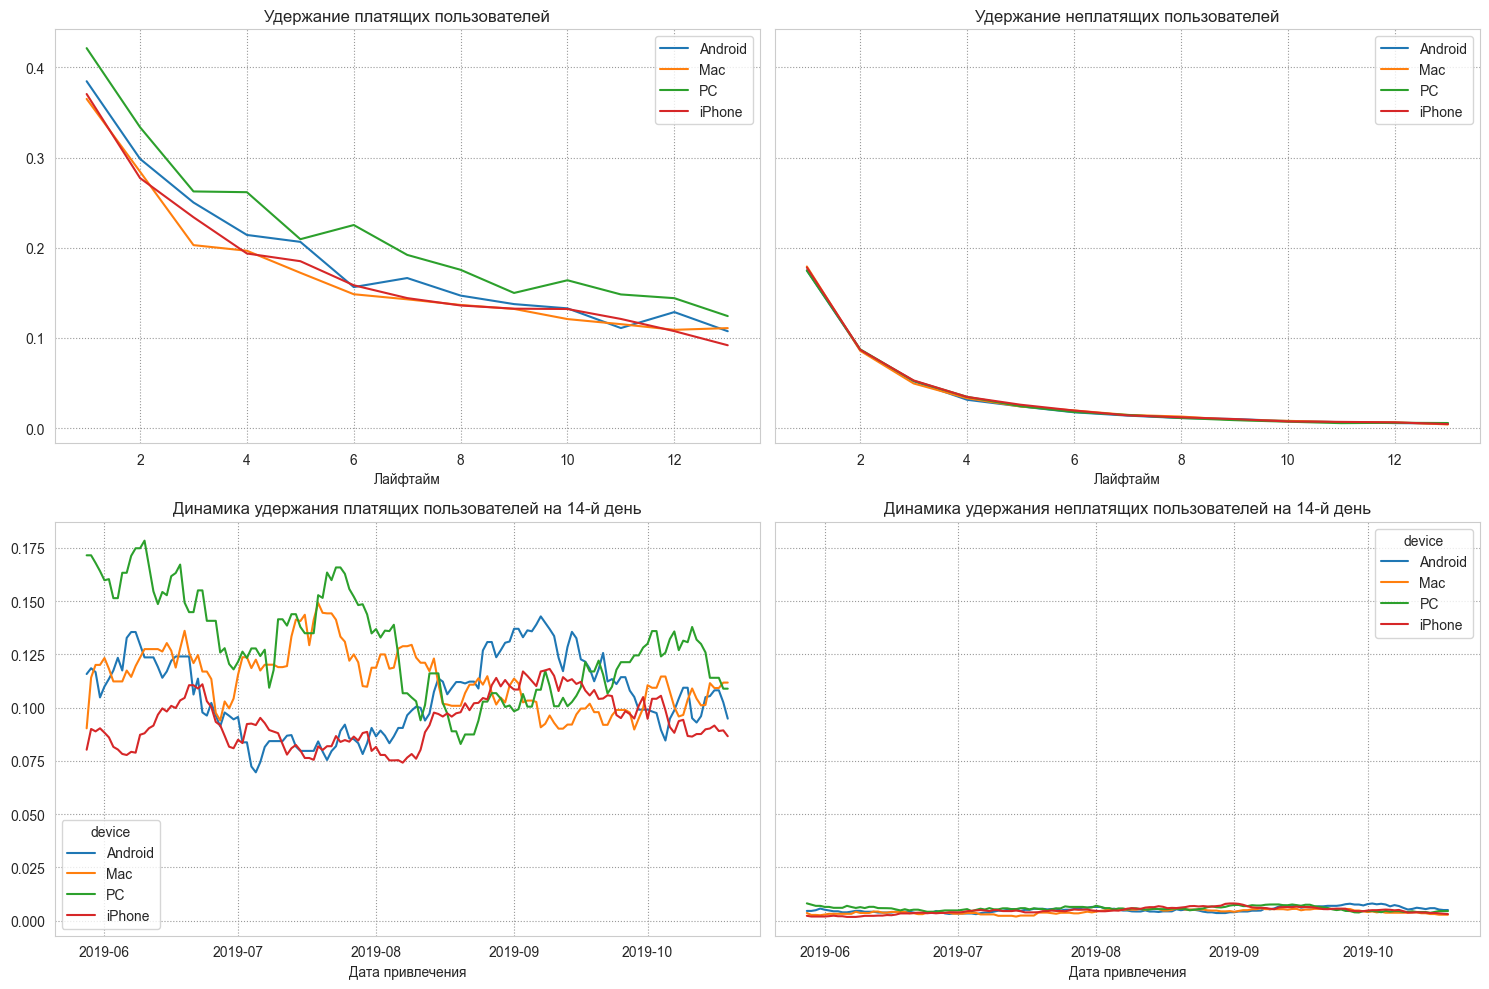

In [137]:
# получим таблицу удержания и удержания в динамике по устройствам
retention_raw, retention, retention_history = get_retention(
                                                            profiles,
                                                            sessions,
                                                            observation_date,
                                                            horizon_days,
                                                            dimensions=['device'],
                                                            ignore_horizon=False,
                                                            )

# построим графики удержания по устройствам
plot_retention(retention, retention_history, horizon_days, window=28)

**Промежуточный вывод:**
- дольше всего с компанией остатются пользователи PC
- кажется, будто между PC и Mac есть связь: на графике динамики они растут и падают одинаковым образом. Возможно, это можно объяснить тем, что оба являются компьютерами, хоть и на разных ОС.

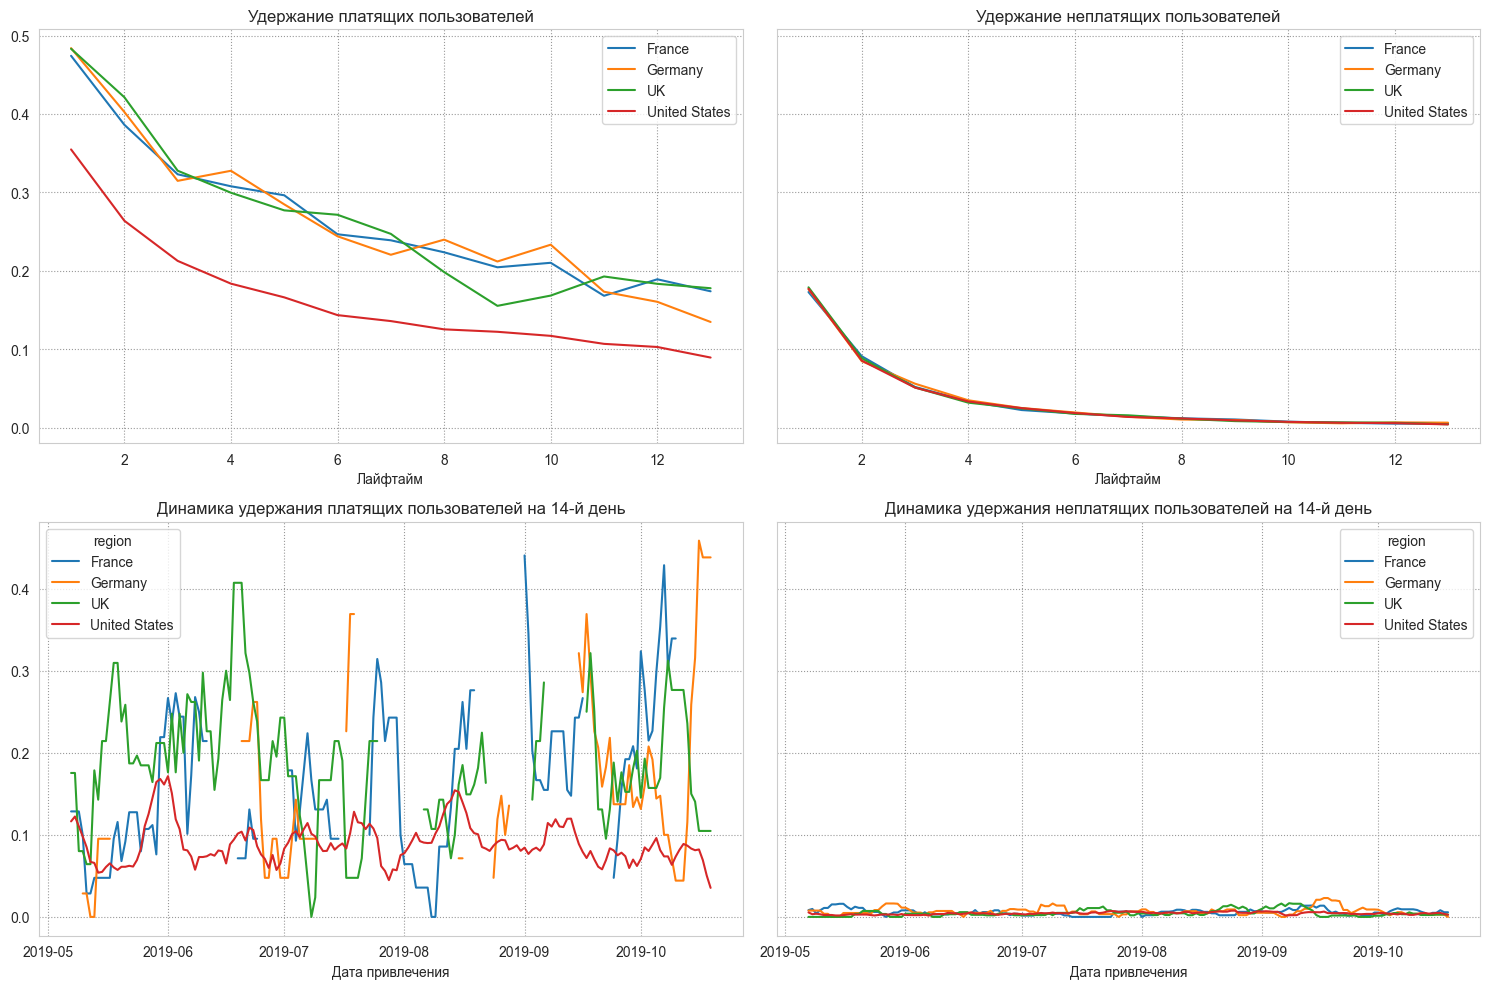

In [138]:
# получим таблицу удержания и удержания в динамике по странам
retention_raw, retention, retention_history = get_retention(
                                                            profiles,
                                                            sessions,
                                                            observation_date,
                                                            horizon_days,
                                                            dimensions=['region'],
                                                            ignore_horizon=False,
                                                            )

# построим графики удержания по странам
plot_retention(retention, retention_history, horizon_days, window=7)

**Промежуточный вывод:**
- показатель удержания в США значительно ниже, чем в любой из европейских стран
- график динамики удержания прерывист для европейских стран, вероятно, из-за того, что вложения в рекламу в данных странах делались не постоянно. Но даже в этом случае коэффициент удержания на 14-й день в любой европейской стране выше, чем в United States

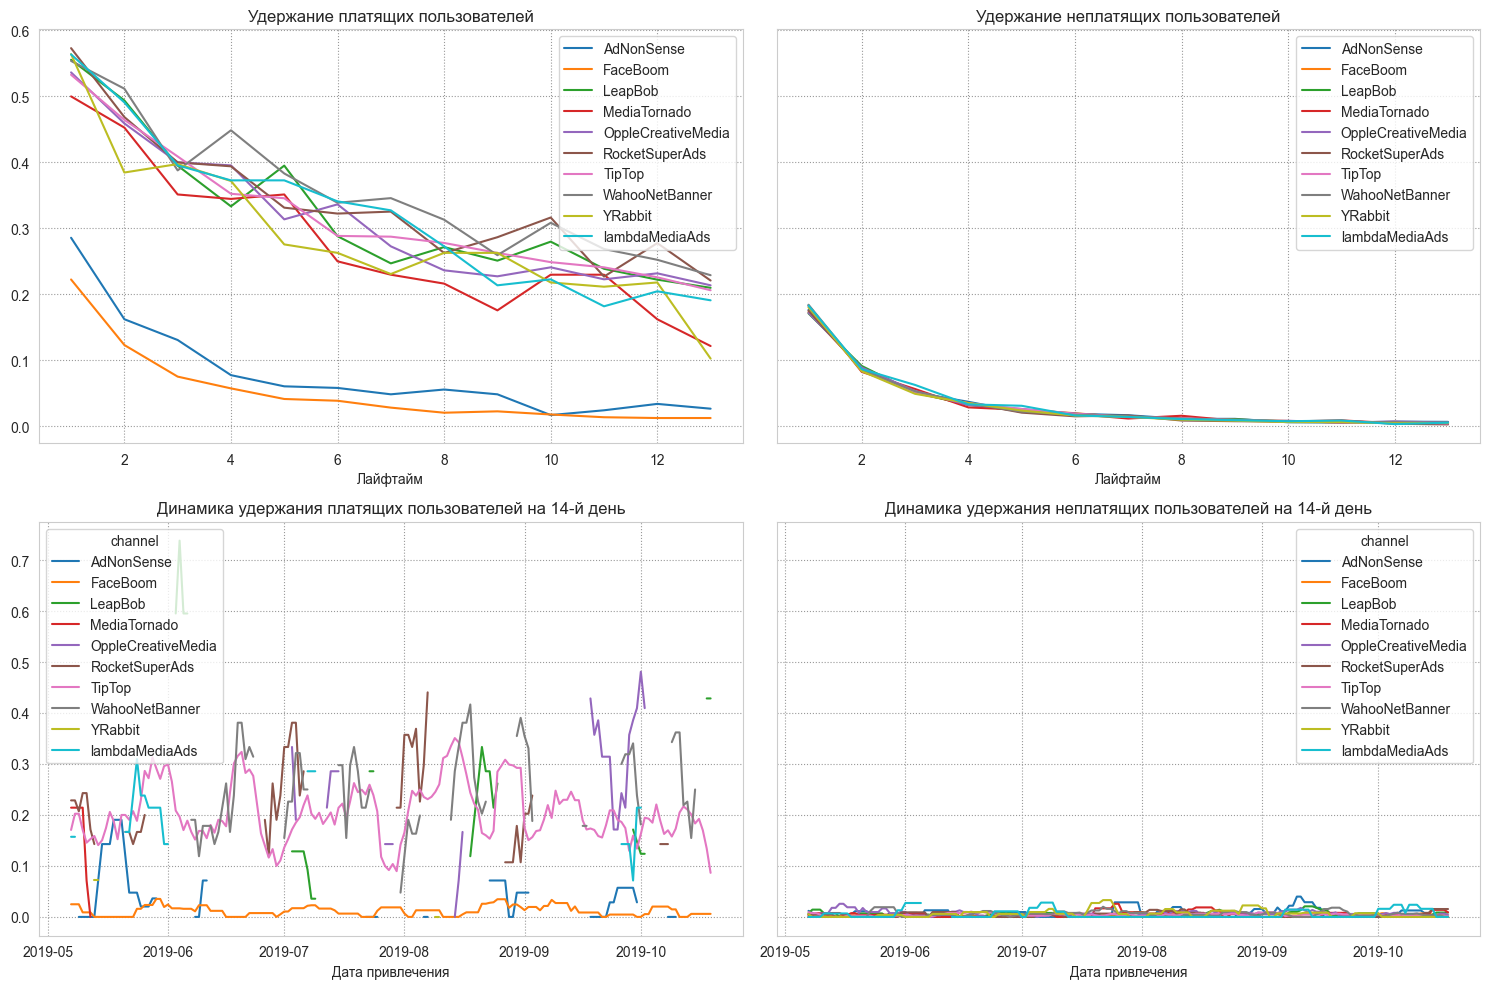

In [139]:
# получим таблицу удержания и удержания в динамике по рекламным каналам
retention_raw, retention, retention_history = get_retention(
                                                            profiles,
                                                            sessions,
                                                            observation_date,
                                                            horizon_days,
                                                            dimensions=['channel'],
                                                            ignore_horizon=False,
                                                            )

# построим графики удержания по рекламным каналам
plot_retention(retention, retention_history, horizon_days, window=7)

**Промежуточный вывод:**
- у каналов FaceBoom и AdNonSense довольно низкий коэффициент удержания
- к 14-му дню у канала FaceBoom крайне низкий коэффициент удержания

<a id='part6.3'></a>
### 3. Анализ окупаемости рекламы с разбивкой по устройствам. Построение графиков LTV, ROI, а также графиков динамики LTV, CAC, ROI.

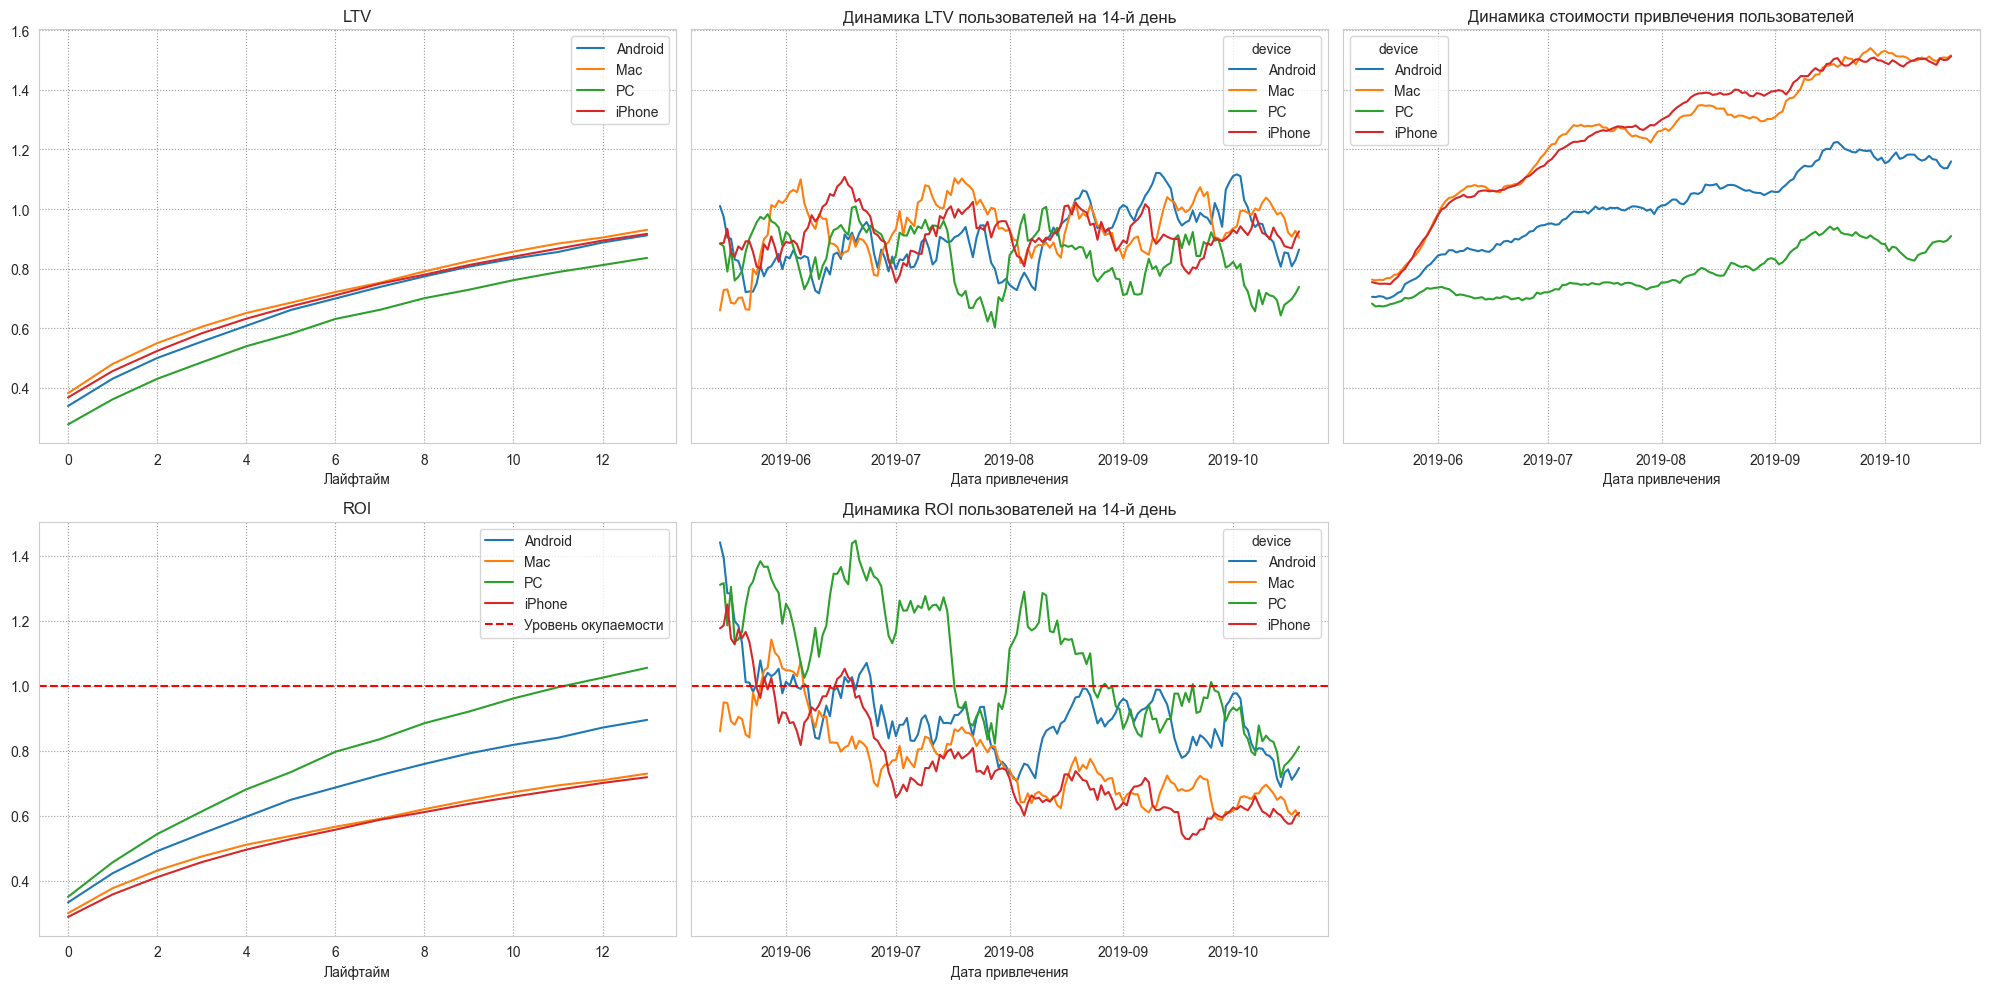

In [140]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
                                                      profiles, purchases, observation_date, \
                                                      horizon_days, dimensions=dimensions
                                                     )

plot_ltv_roi(
             ltv, ltv_history, roi, roi_history, horizon_days, window=14
            )

**Промежуточные выводы:**
- у пользователей PC наименьший LTV, однако благодаря умеренному росту затрат на привлечение (по сравнению с другими устройствами), только пользователям PC удаётся достичь окупаемости на 14 день по крайней мере до середины июля и потом почти весь август. Далее из-за недостаточного темпа роста LTV и роста затрат, когорты, начиная с четвёртой недели августа, перестают окупаться.
- что касается остальных устройств, ни одна когорта не окупилась преимущественно из-за слишком высокой стоимости привлечения пользователей.

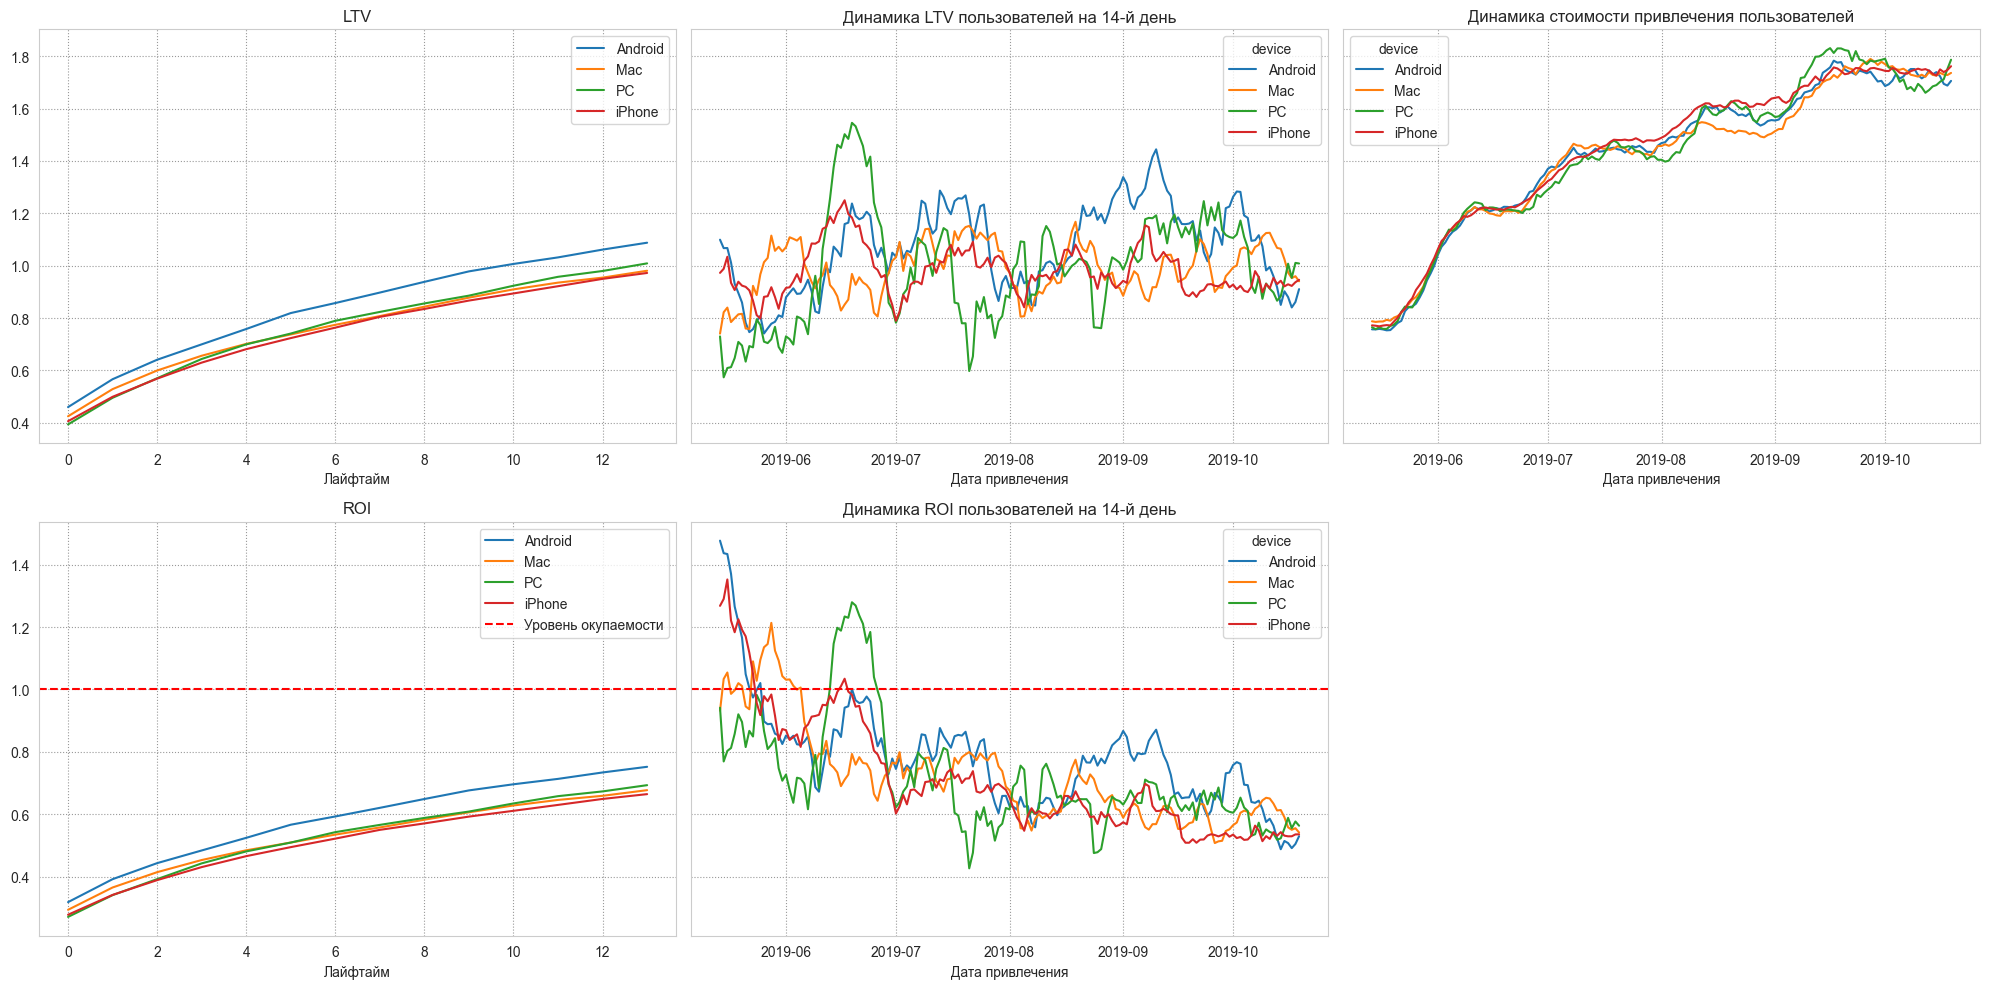

In [141]:
# смотрим окупаемость с разбивкой по устройствам в United States

dimensions = ['device']

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
                                                      profiles.query('region == "United States"'), \
                                                      purchases, observation_date, horizon_days, dimensions=dimensions
                                                     )

plot_ltv_roi(
             ltv, ltv_history, roi, roi_history, horizon_days, window=14
            )

**Промежуточный вывод:**
- из-за возросших со временем затрат на привлечение пользователей, ROI ни одного устройства в США не преодолело уровень окупаемости.
- если не учитывать уровень затрат, наиболее предпочтительное устройство - Android с самым высоким LTV. Однако отличаются они между собой не разительно.

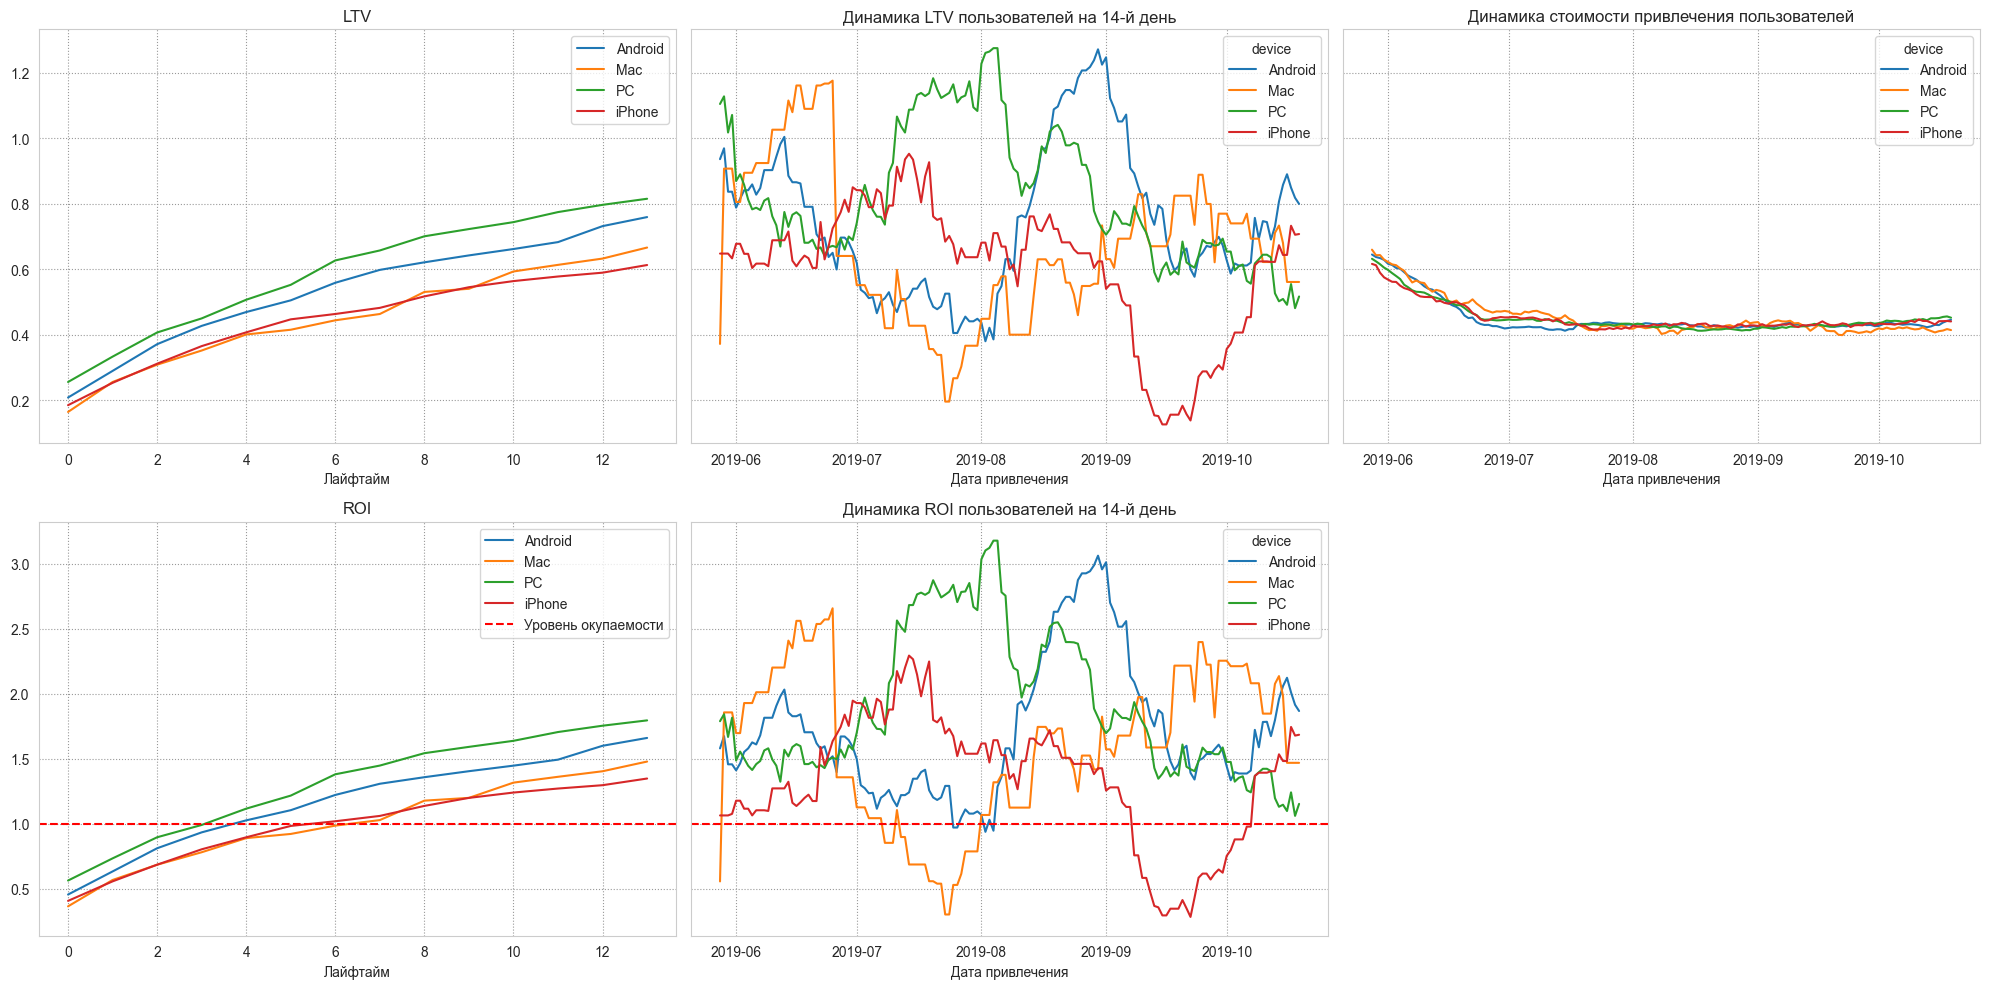

In [142]:
# смотрим окупаемость с разбивкой по устройствам в UK

dimensions = ['device']

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
                                                      profiles.query('region == "UK"'), \
                                                      purchases, observation_date, horizon_days, dimensions=dimensions
                                                     )

plot_ltv_roi(
             ltv, ltv_history, roi, roi_history, horizon_days, window=28
            )

**Промежуточный вывод:**
- инвестиции по большинству устройств окупаются приблизительно на 3-5 день.
- самое предпочтительное устройство: PC
- самые непредпочтительные когорты для Mac приходятся на последние две недели июля
- самые непредпочтительные когорты для iPhone приходятся на последние три недели сентября

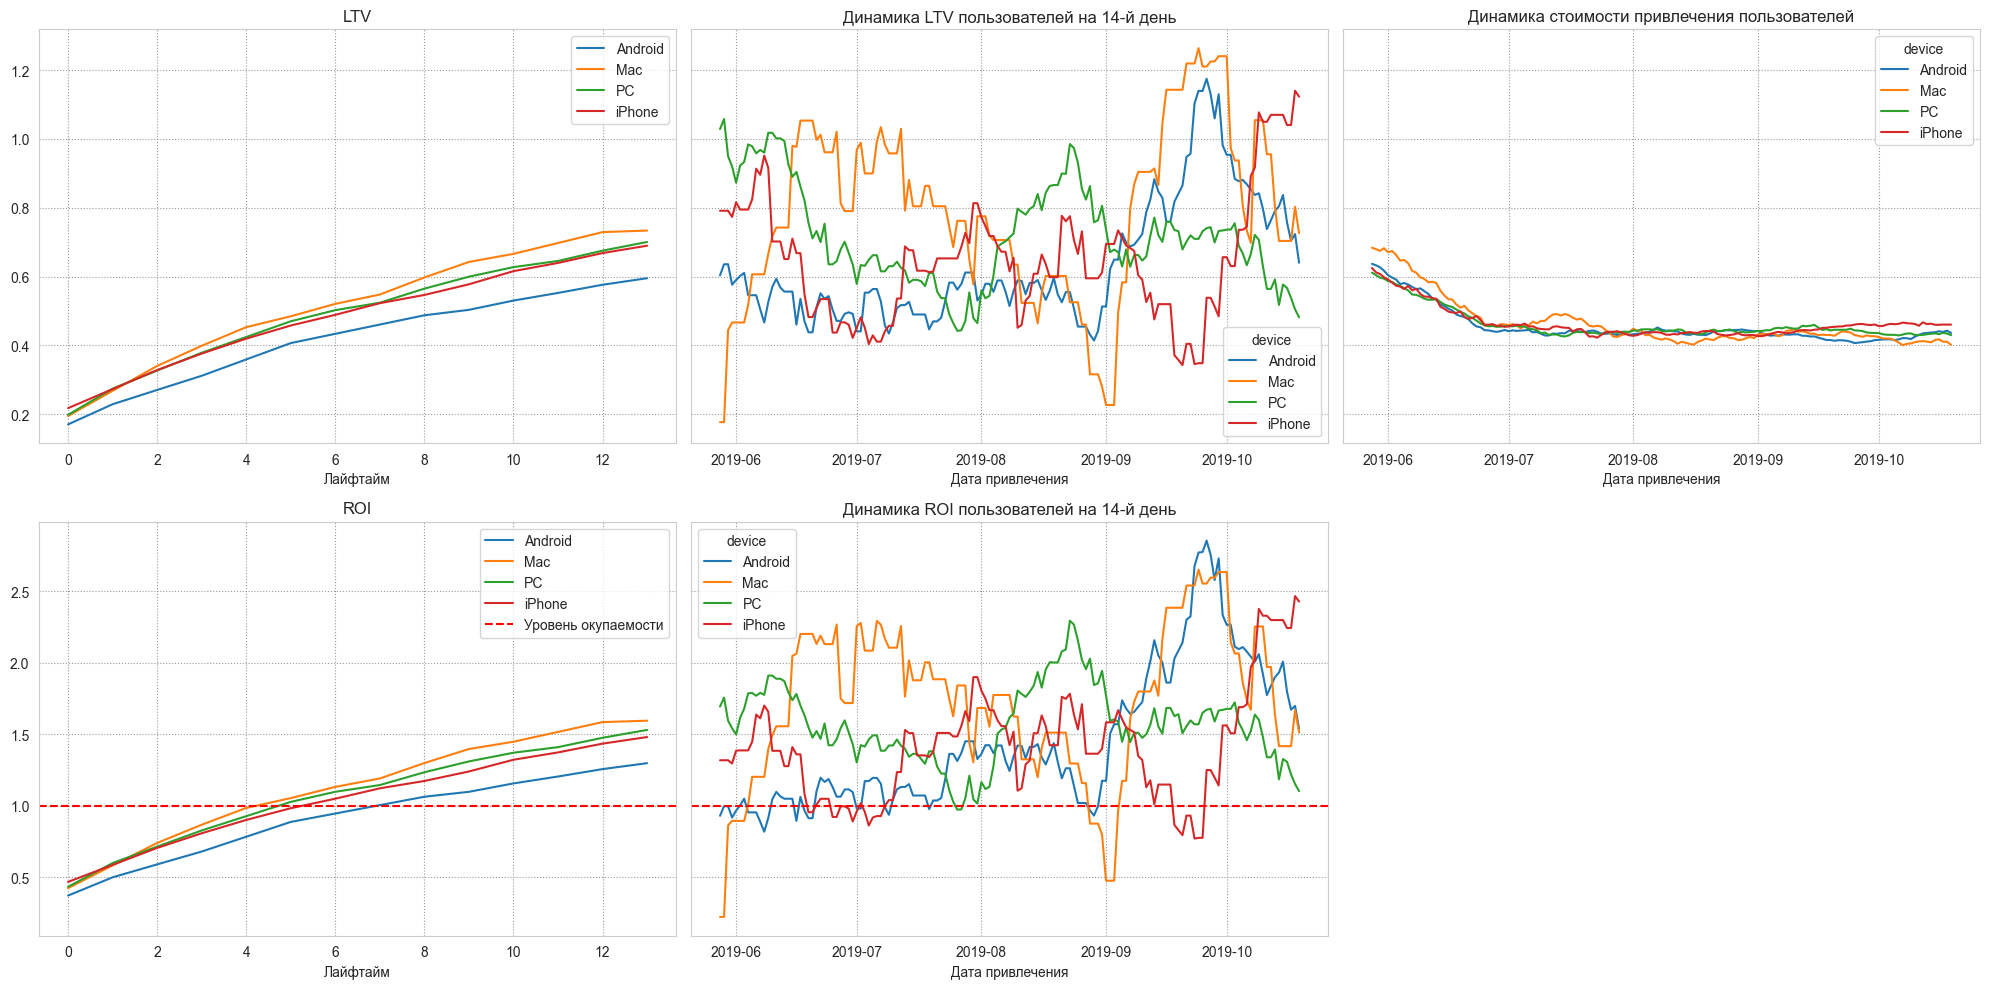

In [143]:
# смотрим окупаемость с разбивкой по устройствам в France

dimensions = ['device']

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
                                                      profiles.query('region == "France"'), \
                                                      purchases, observation_date, horizon_days, dimensions=dimensions
                                                     )

plot_ltv_roi(
             ltv, ltv_history, roi, roi_history, horizon_days, window=28
            )

**Промежуточный вывод:**
- инвестиции по большинству устройств окупаются приблизительно на 4-7 день.
- самое предпочтительное устройство: Mac
- самые предпочтительные когорты для Mac приходятся на месяц с середины июня до середины июля, а также на последние две недели сентября

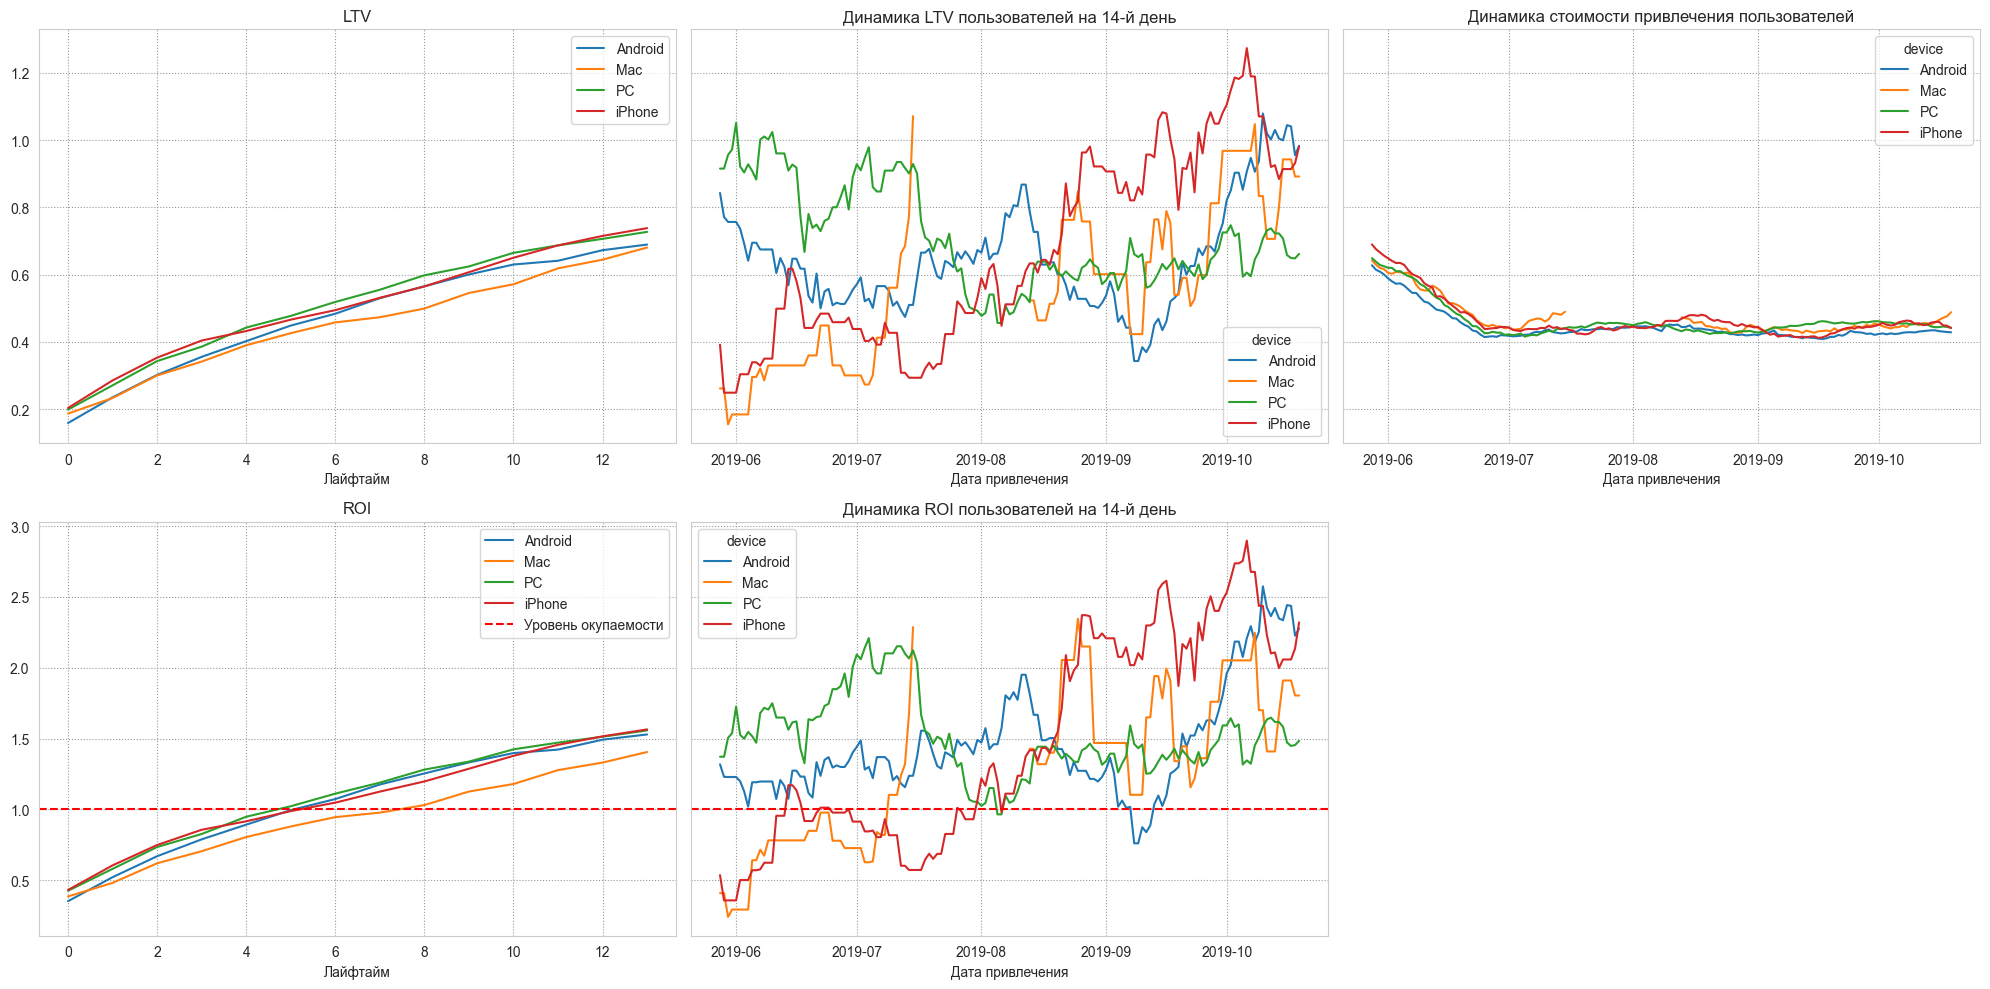

In [144]:
# смотрим окупаемость с разбивкой по устройствам в Germany

dimensions = ['device']

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
                                                      profiles.query('region == "Germany"'), \
                                                      purchases, observation_date, horizon_days, dimensions=dimensions
                                                     )

plot_ltv_roi(
             ltv, ltv_history, roi, roi_history, horizon_days, window=28
            )

**Промежуточный вывод:**
- наименее предпочтительное устройство - Mac. Все остальные по предпочтительности находятся примерно на одном уровне (исходя из ROI)
- исходя из LTV, самое предпочтительное устройство - iPhone
- как выяснилось, почти каждая страна имеет разные предпочтения с точки зрения устройств.
- интересное замечание: на общих графиках по всем устройствам (без разбивки по странам) выяснилось, что вложения ни по одному из устройств не окупаются. Та же картина сохранилась при анализе окупаемости по устройствам только в США, однако при анализе по европейским странам мы наконец-то увидели окупаемость. Это означает, что неокупаемость в США настолько значительна, что она нивелирует всю прибыль от других стран. Вложения в США являются основной причиной убыточности компании.

<a id='part6.4'></a>
### 4. Анализ окупаемости рекламы с разбивкой по странам. Построение графиков LTV, ROI, а также графиков динамики LTV, CAC, ROI.

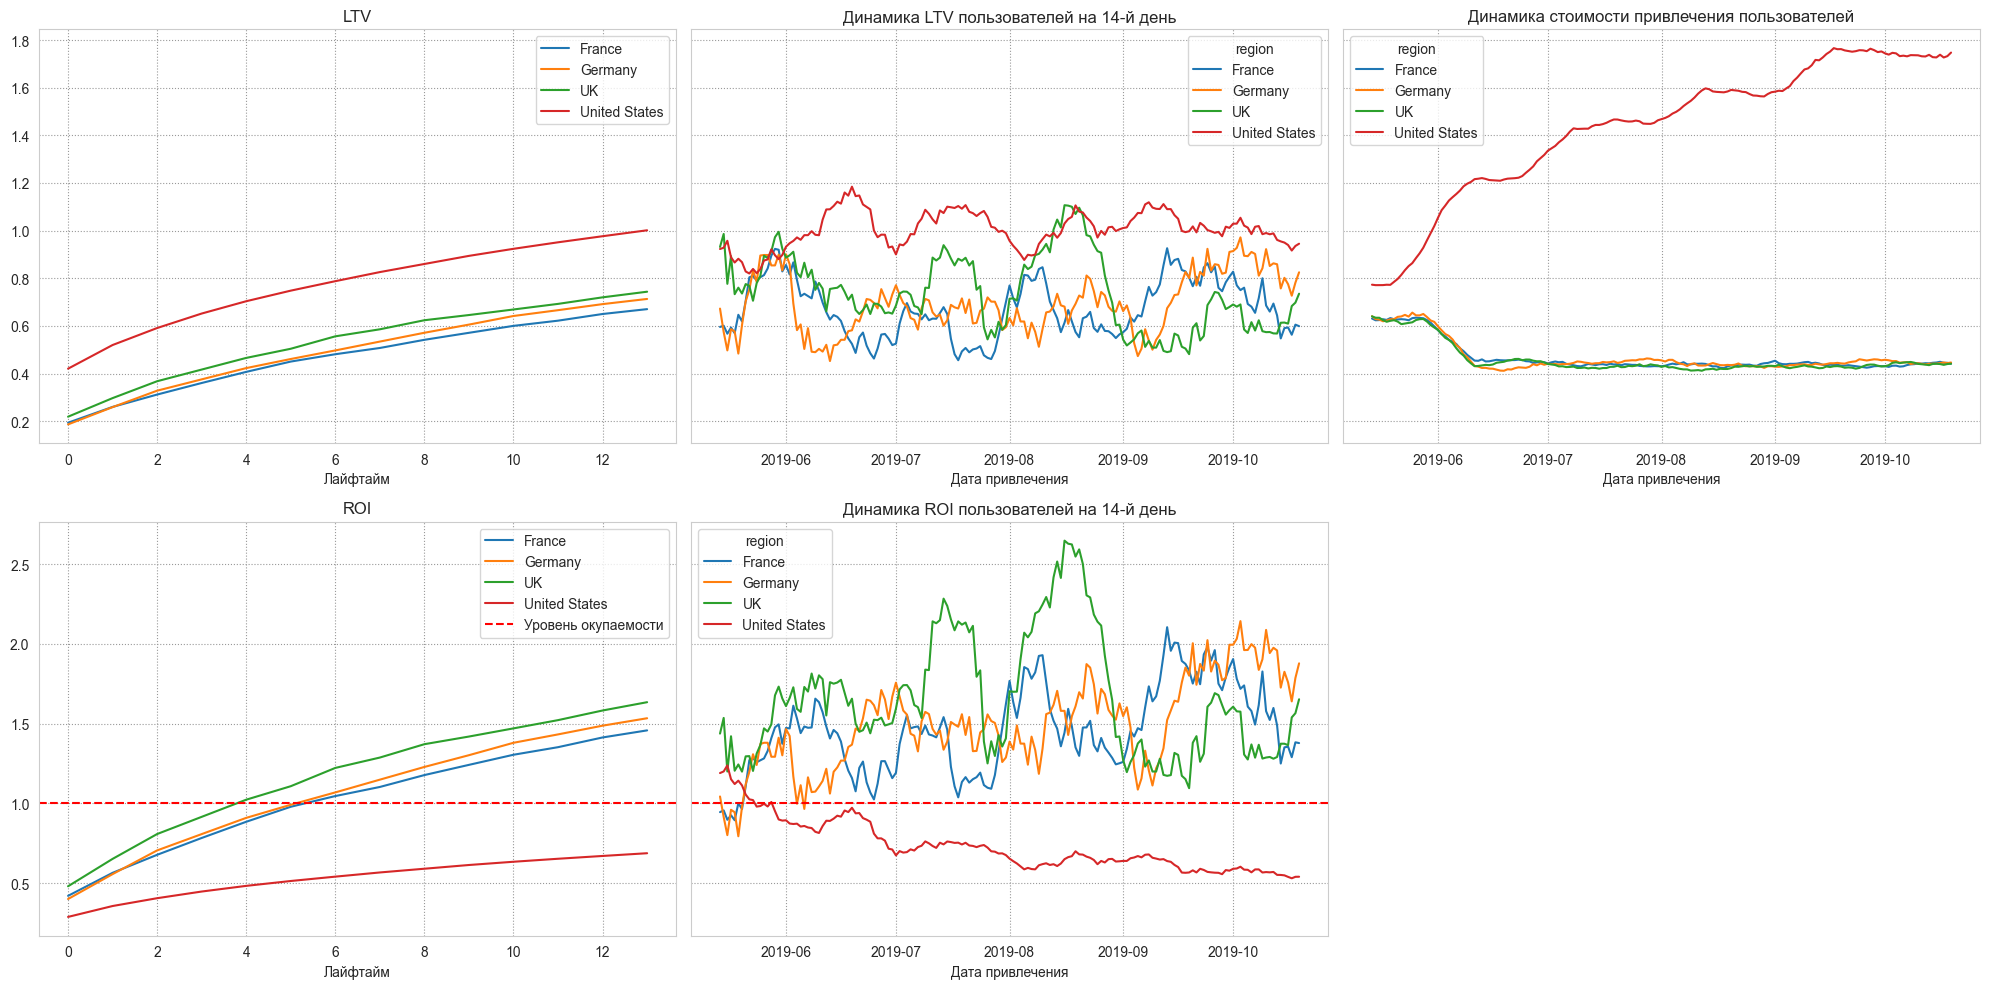

In [145]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
                                                      profiles, purchases, observation_date, \
                                                      horizon_days, dimensions=dimensions
                                                     )

plot_ltv_roi(
             ltv, ltv_history, roi, roi_history, horizon_days, window=14
            )

**Промежуточный вывод:**
- United States имеет самый высокий LTV, однако по мере увеличения затрат на привлечение одного пользователя, они перестают окупаться.
- на 14-й день ROI по европейским странам во всех когортах окупается. Особенно можно выделить августовские когорты. Около полутора недель середины июля ROI в UK также довольно высок.

<a id='part6.5'></a>
### 5. Анализ окупаемости рекламы с разбивкой по рекламным каналам. Построение графиков LTV, ROI, а также графиков динамики LTV, CAC, ROI.

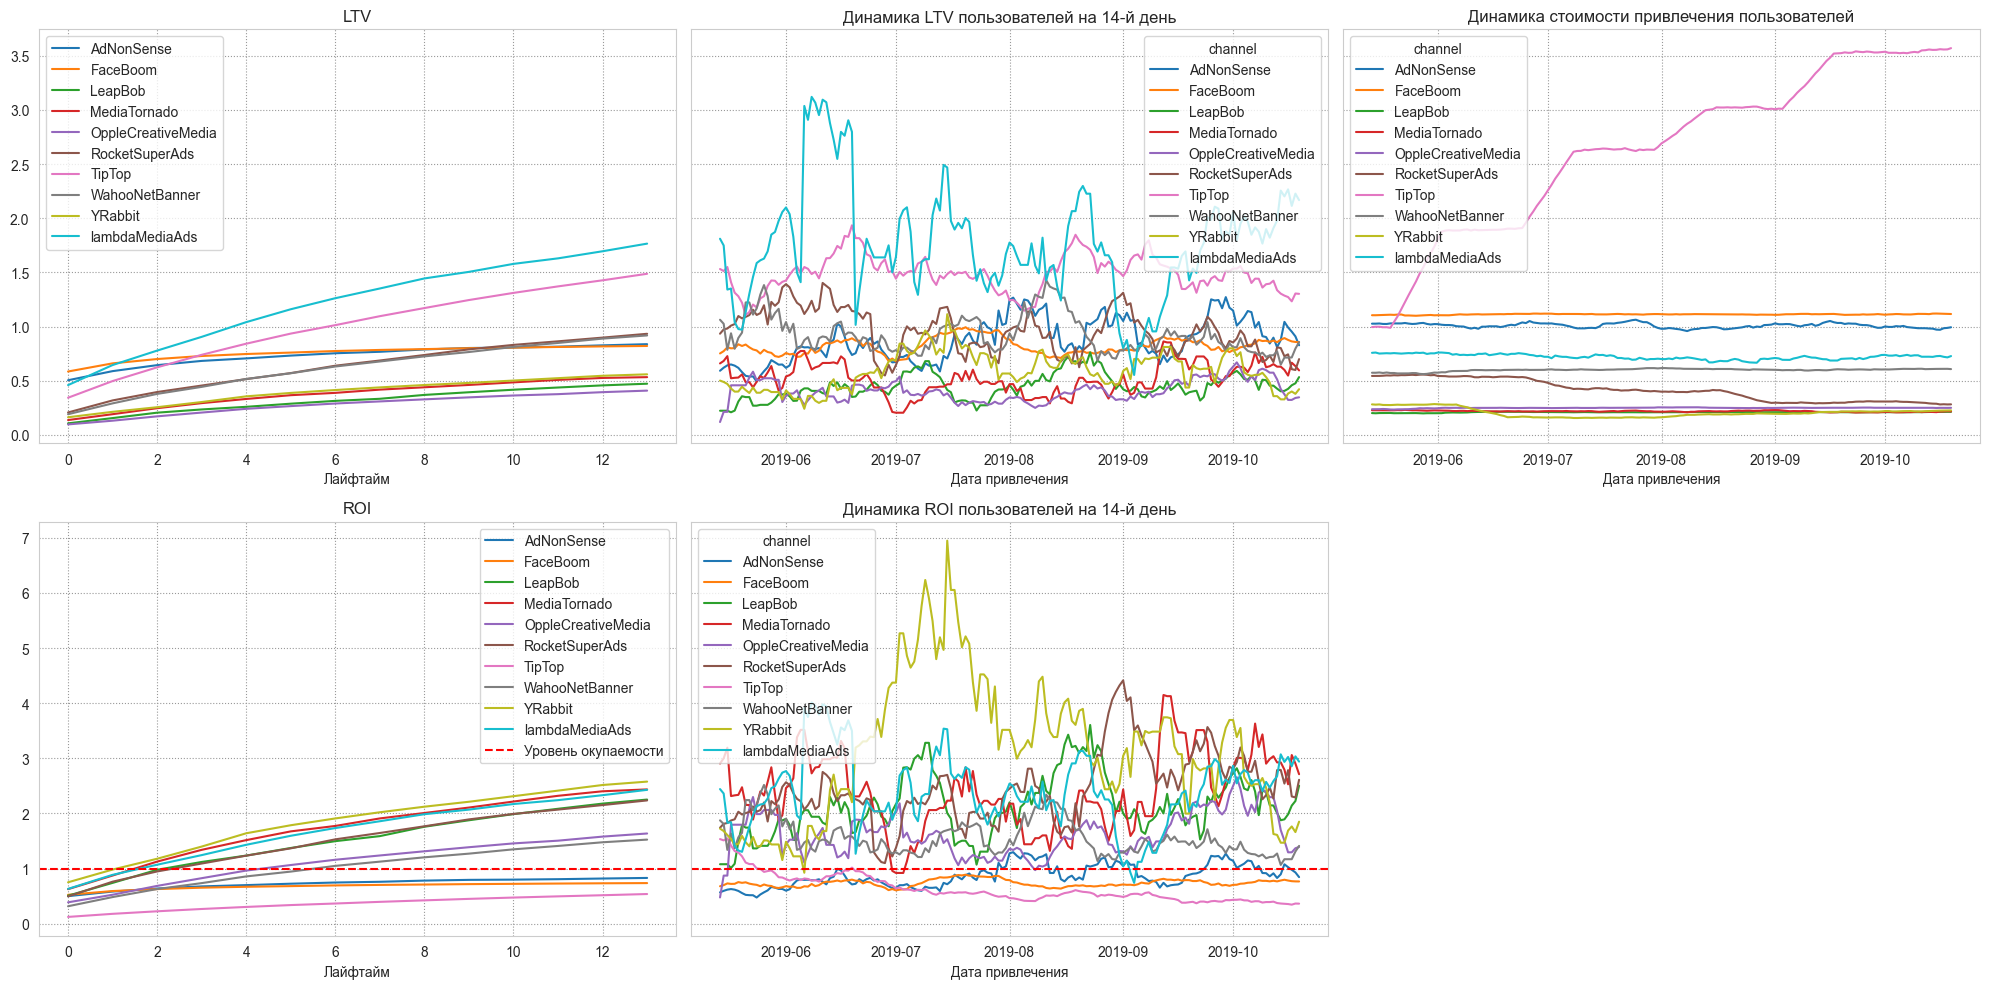

In [146]:
# смотрим окупаемость с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
                                                      profiles, purchases, observation_date, \
                                                      horizon_days, dimensions=dimensions
                                                     )

plot_ltv_roi(
             ltv, ltv_history, roi, roi_history, horizon_days, window=14
            )

**Промежуточный вывод:**
- у lambdaMediaAds и TipTop наибольший LTV, однако из-за сильно возросшей стоимости привлечения пользователей по каналу TipTop, он становится неокупаемым.
- первые две недели июня приносили компании пользователей с самым высоким LTV от lambdaMediaAds
- у FaceBoom одни из самых высоких затрат на привлечение пользователей, однако LTV к 14 дню прекращает рост и останавливается на уровне 0.7, тогда как CAC изначально выше самого высокого уровня LTV FaceBoom.
- самый высокий ROI у рекламного канала YRabbit, особенно можно выделить июльскую когорту. "Взрыв" в июльской когорте можно объяснить тем, что как раз в июле CAC канала YRabbit уменьшился, при этом LTV на 14-й день увеличился.

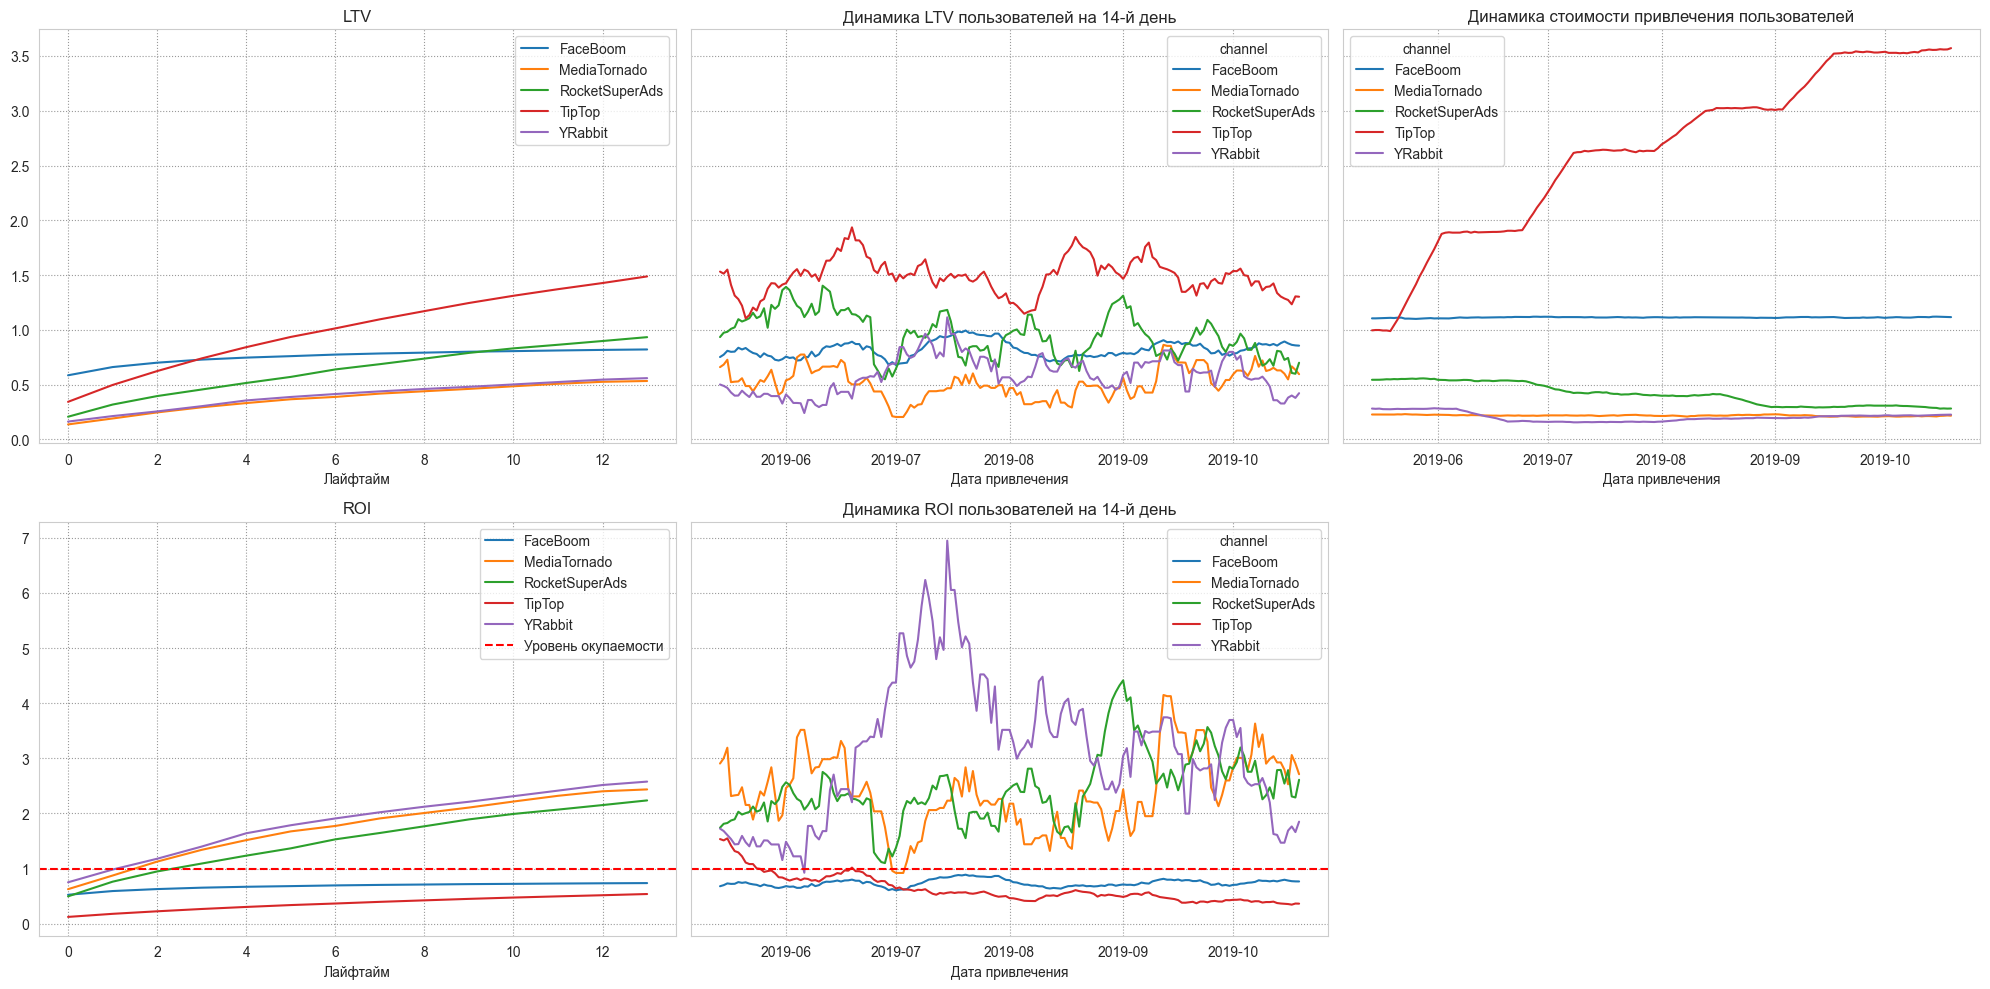

In [147]:
# смотрим окупаемость с разбивкой по рекламным каналам в США

dimensions = ['channel']

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
                                                      profiles.query('region == "United States"'), \
                                                      purchases, observation_date, horizon_days, dimensions=dimensions
                                                     )

plot_ltv_roi(
             ltv, ltv_history, roi, roi_history, horizon_days, window=14
            )

**Промежуточный вывод:**
- к рекомендуемым рекламным каналам для США можно отнести следующие (по убыванию): YRabbit, MediaTornado, RocketSuperAds.
- не рекомендуется вкладывать в FaceBoom, так как скорость роста LTV недостаточно велика и даже не может добраться до неизменного уровня трат на привлечение.
- у TipTop самый высокий LTV, однако стоимость привлечения пользователей чрезвычайно высока. Если есть возможность вернуться на тот уровень затрат, который был в самом начале исследуемого периода, то вложения в TipTop будут иметь смысл. В ином случае также не рекомендуется.

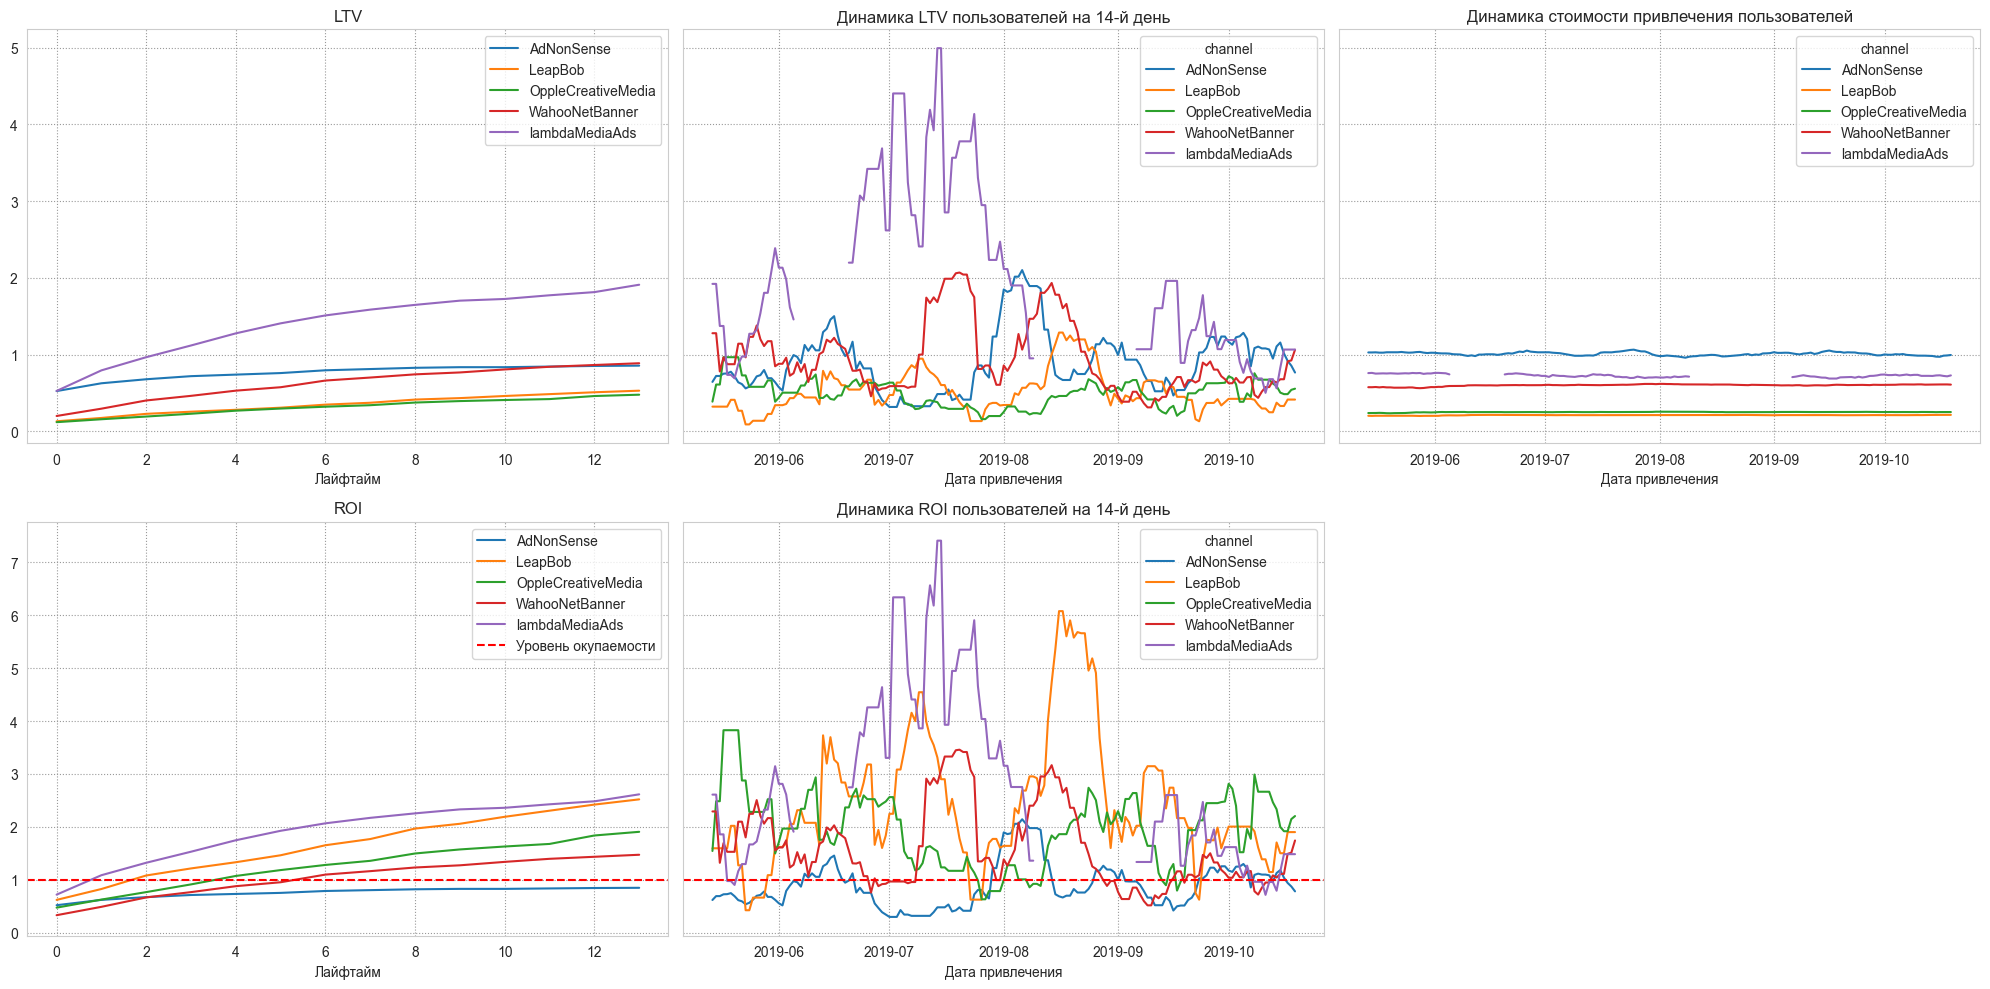

In [148]:
# смотрим окупаемость с разбивкой по рекламным каналам в UK

dimensions = ['channel']

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
                                                      profiles.query('region == "UK"'), \
                                                      purchases, observation_date, horizon_days, dimensions=dimensions
                                                     )

plot_ltv_roi(
             ltv, ltv_history, roi, roi_history, horizon_days, window=14
            )

**Промежуточные выводы:**
- к рекомендуемым каналам для UK можно отнести следующие (по убыванию): lambdaMediaAds, LeapBob, OppleCreativeMedia, WahooNetBanner.
- не рекомендуется вкладывать в AdNonSense.

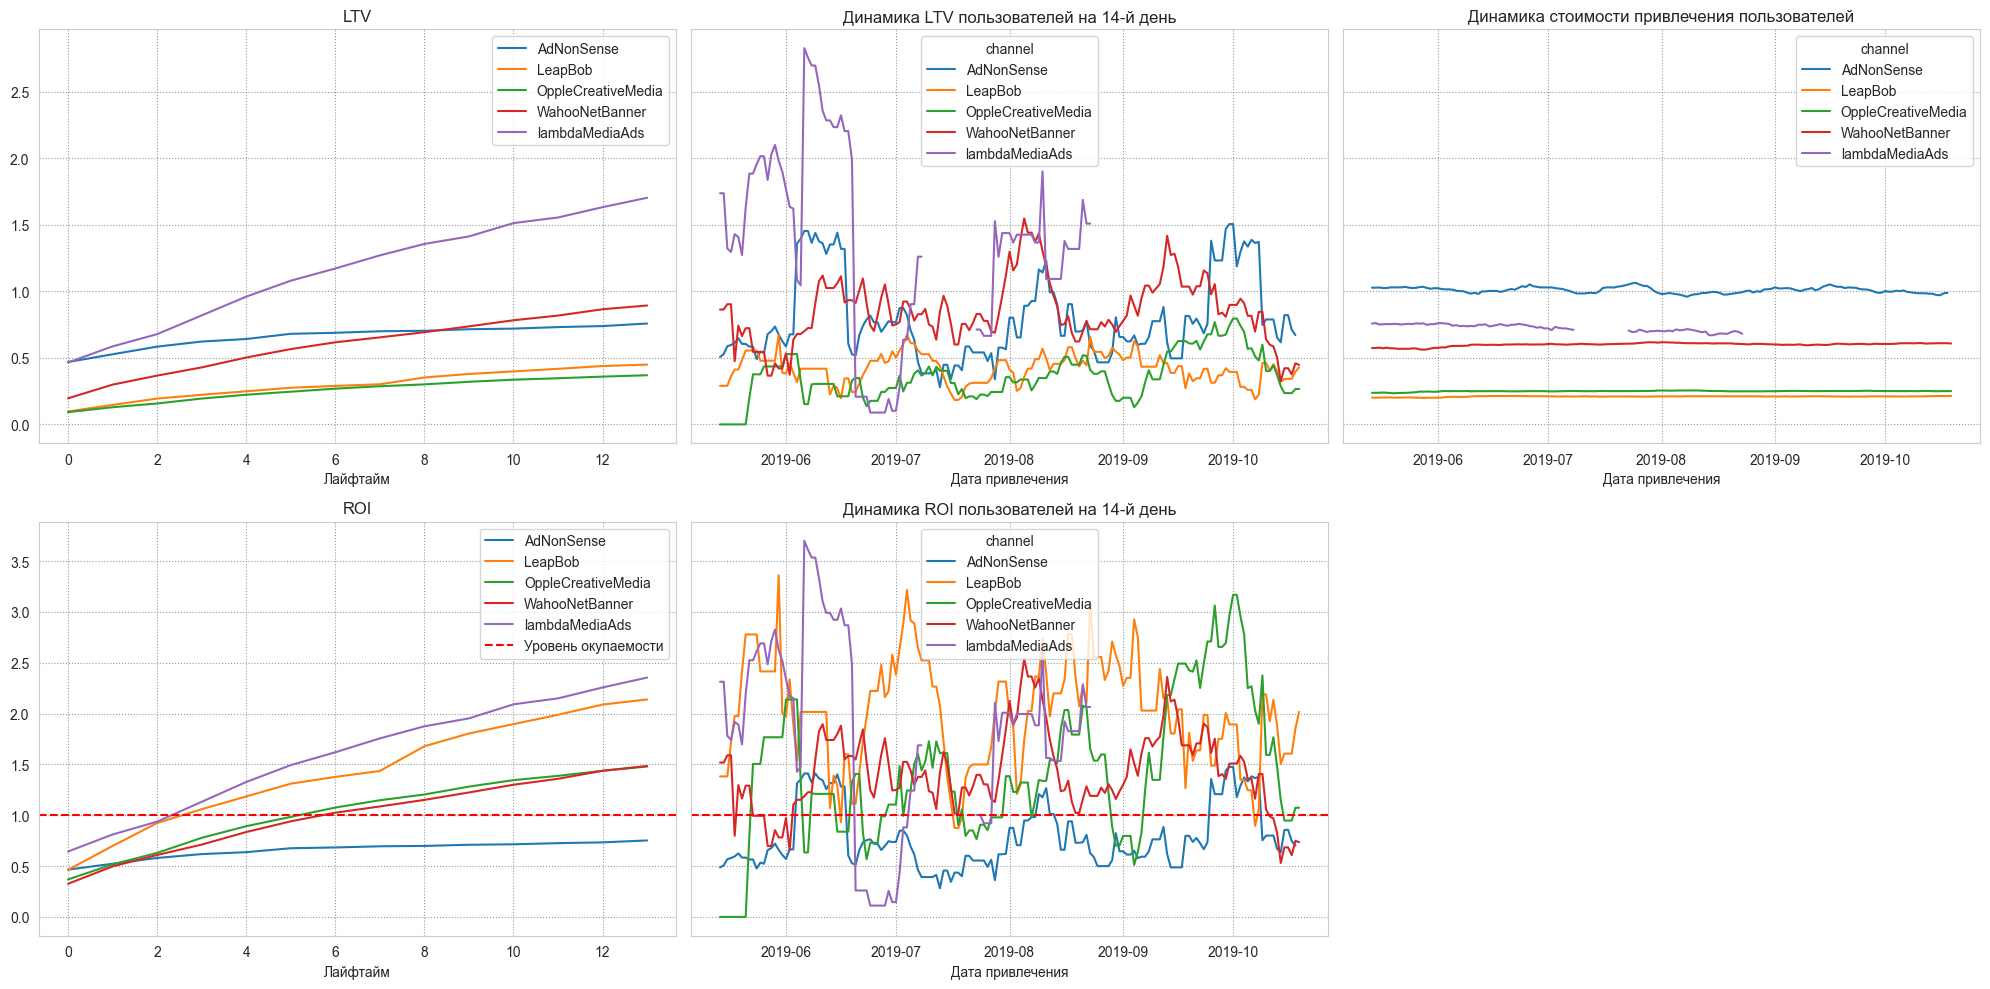

In [149]:
# смотрим окупаемость с разбивкой по рекламным каналам в France

dimensions = ['channel']

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
                                                      profiles.query('region == "France"'), \
                                                      purchases, observation_date, horizon_days, dimensions=dimensions
                                                     )

plot_ltv_roi(
             ltv, ltv_history, roi, roi_history, horizon_days, window=14
            )

**Промежуточный вывод:**
- к рекомендуемым каналам для France можно отнести следующие (по убыванию): lambdaMediaAds, LeapBob, OppleCreativeMedia, WahooNetBanner.
- не рекомендуется вкладывать в AdNonSense.

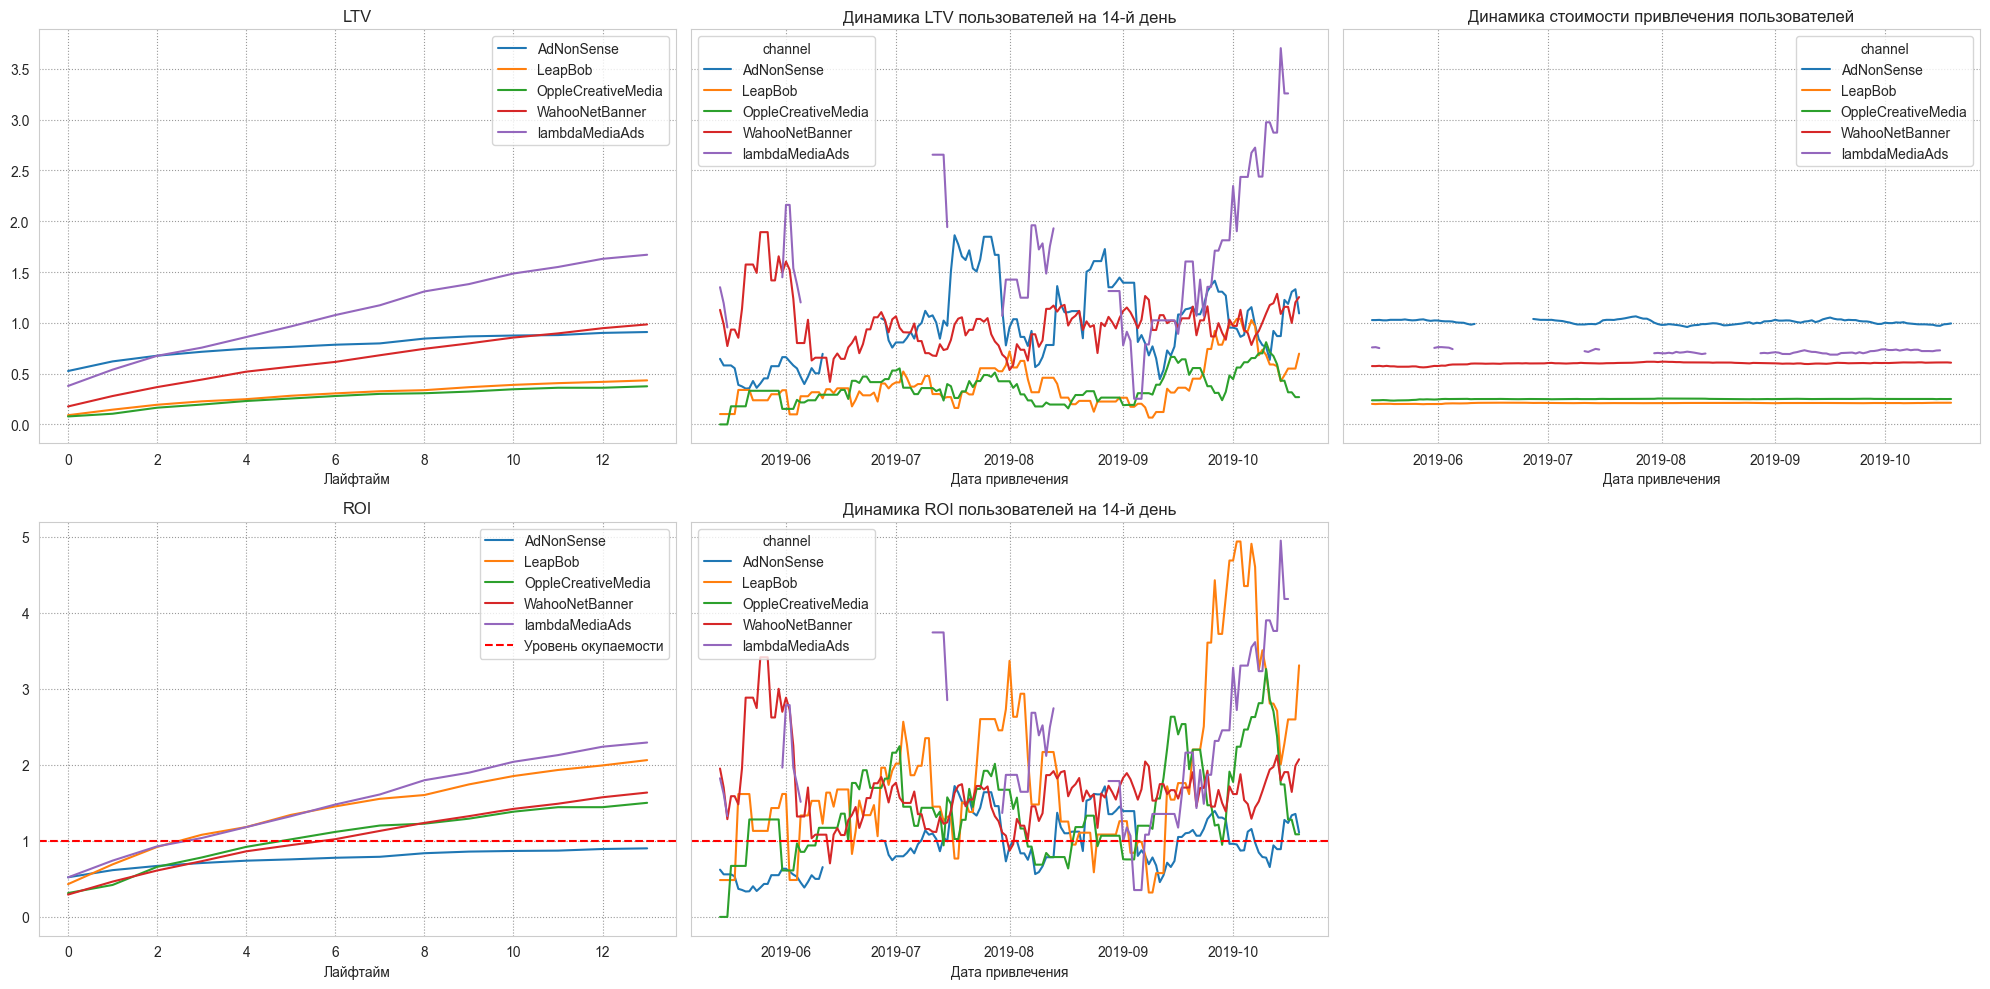

In [150]:
# смотрим окупаемость с разбивкой по рекламным каналам в Germany

dimensions = ['channel']

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
                                                      profiles.query('region == "Germany"'), \
                                                      purchases, observation_date, horizon_days, dimensions=dimensions
                                                     )

plot_ltv_roi(
             ltv, ltv_history, roi, roi_history, horizon_days, window=14
            )

**Промежуточный вывод:**
- к рекомендуемым каналам для Germany можно отнести следующие (по убыванию): lambdaMediaAds, LeapBob, OppleCreativeMedia, WahooNetBanner.
- не рекомендуется вкладывать в AdNonSense.
- как оказалось, рекламные каналы в США и европейских странах (UK, France, Germany) не пересекаются. Среди рекламных каналов Европы практически нет не окупающихся, тогда как среди не окупающихся каналов США присутствуют два, на которые уходит существенная часть затрат, из-за чего компания и терпит убытки.

**Выводы по части 6:**
- реклама, направленная на привлечение пользователей в целом, не окупается.
- что касается негативного влияния устройств на окупаемость рекламы, в разных странах ситуация с устройствами разная: в США хуже всего окупается iPhone, в UK - iPhone, в France - Android, в Germany - Mac.
- что касается негативного влияния страны на окупаемость рекламы, United States не окупается вовсе.
- что касается негативного влияния рекламных каналов на окупаемость рекламы, в разных странах ситуация с рекламными каналами разная: в США не окупаются TipTop, FaceBoom, а во всех европейских странах - AdNonSense.
- проблемы окупаемости могут быть вызваны существенными затратами на привлечение пользователей рынка США, а именно на каналы TipTop и FaceBoom. Существенность затрат ведёт к ROI меньше 1 по этим каналам, также данные затраты нивелируют всю прибыль с европейского рынка. Данные причины ведут к убыточности компании.

<a id='part7'></a>
## Часть 7. Написание общего вывода

**Причины неэффективности привлечения пользователей:**
1. Высокие затраты на каналы привлечения, которые не окупаются (TipTop и FaceBoom).
2. Недофинансирование европейских стран, где существуют более подходящие каналы привлечения (lambdaMediaAds).


**Рекомендации:**

- По United States:
  1. Самое предпочитаемое устройство: Android, самое менее предпочтительное - iPhone, однако в целом они мало друг от друга отличаются, поэтому следовало бы покупать рекламу на всех устройствах.
  2. Предпочитаемые рекламные каналы: YRabbit, MediaTornado, RocketSuperAds.
  3. Вернуться по затратам по каналу TipTop на уровень начала периода.
  4. Изначальный уровень затрат на привлечение по каналу FaceBoom выше, чем LTV к 14-му дню, следовательно, от привлечения по данному каналу следовало бы отказаться. Также у данного канала наименьший коэффициент удержания платящих пользователей.
  5. United States, на фоне других стран, имеет наибольший LTV, но из-за слишком высоких затрат ROI не достигает уровня окупаемости. Не следует так сразу отказываться от рынка США, однако следует изменить свои приоритеты при выборе каналов привлечения. Компания тратит на рынок США как минимум 87000 (по 55000 на TipTop и 32000 на FaceBoom) из совокупных 105000 (!), и, как стало известно из нашего анализа, огромнейшая часть этих затрат не окупается. Следует перераспределить бюджет на другие каналы.


- По UK:
  1. Все устройства окупаются, но именно PC делает это быстрее остальных устройств, поэтому, вероятно, ему следует отдавать чуть большее предпочтение.
  2. Предпочитаемые рекламые каналы: lambdaMediaAds, LeapBob, OppleCreativeMedia, WahooNetBanner, особенно lambdaMediaAds. Также у lambdaMediaArts наибольший коэффициент конверсии.
  3. Не следует рекламироваться через AdNonSense (ситуация аналогичная, как и с FaceBoom в США). Также у данного канала наименьший коэффициент удержания платящих пользователей.
  4. UK имеет наибольший коэффициент удержания на 14-й день.


- По France:
  1. Все устройства окупаются, однако самое предпочтительное - Mac, менее предпочтительное - Android.
  2. Предпочитаемые рекламые каналы: lambdaMediaAds, LeapBob, OppleCreativeMedia, WahooNetBanner, особенно lambdaMediaAds. Также у lambdaMediaArts наибольший коэффициент конверсии.
  3. Не следует рекламироваться через AdNonSense (ситуация аналогичная, как и с FaceBoom в США). Также у данного канала наименьший коэффициент удержания платящих пользователей.
  4. UK имеет наибольший коэффициент удержания на 14-й день.


- По Germany:
  1. Хуже и позже всех окупается реклама на Mac, по всем остальным устройствам примерно в одно время и одинаково хорошо.
  2. Предпочитаемые рекламые каналы: lambdaMediaAds, LeapBob, OppleCreativeMedia, WahooNetBanner, особенно lambdaMediaAds. Также у lambdaMediaArts наибольший коэффициент конверсии.
  3. Не следует рекламироваться через AdNonSense (ситуация аналогичная, как и с FaceBoom в США). Также у данного канала наименьший коэффициент удержания платящих пользователей.
  4. Большинство каналов европейских стран успешно и довольно быстро окупаются, однако этим странам недостаёт финансирования. Возможно, следует рассмотреть возможность б*о*льшего вклада в эти страны.


- Если не учитывать анализ по ROI, больше всего платящих пользователей пользуется iPhone.
- У PC наибольшой коэффициент удержания платящих пользователей.
- У Mac наибольший коэффициент конверсии.